# HOUSING: PRICE PREDICTION

# Problem Statement-

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
    
• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Business Goal-

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Technical Requirements-

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. We need to treat them using the domain knowledge and our own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. We need to handle them accordingly.

• We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• We need to find important features which affect the price positively or negatively.


# DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded successfully")

All libraries are loaded successfully


In [2]:
df = pd.read_csv("housing train.csv")

In [3]:
#checking the dataset-
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


# Label Description-

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The dataset is in .CSV format and consists of 1168 records with 81 features as explained below:

Id: Identification number for particular record.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

It is a Regression Problem because the target feature SalePrice is of continuous kind.

In [6]:
df.shape

(1168, 81)

# EDA

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

So there is numerical & categorical data types present in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

we can see that-
There are 38 discrete (3-Float and 35-int) and 43 continuous type features.

Before delivering it for model training, discrete (object) type features must be encoded.

Non-null Count denotes the presence of null values in many features and should be handled as such.

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

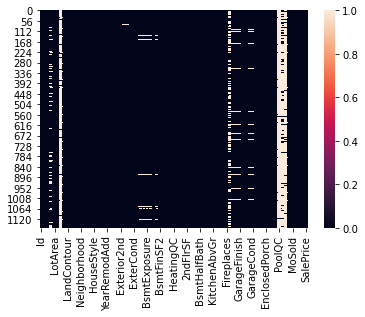

In [10]:
sns.heatmap(df.isnull())

So there is null value present in the dataset.

In [11]:
df.drop(['Id'],axis=1,inplace=True)

Feature Id is being removed since it refers to a record's identification number and is no longer relevant.

In [12]:
#checking shape
df.shape

(1168, 80)

In [13]:
#Checking null values in features
null_values = df.isnull().sum()

print("Features contains null values- ")
null_values[null_values>0]

Features contains null values- 


LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

The features listed above include null values and must be regarded as such.

In [14]:
#lets see the % of null values of each column in the dateset-
(df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(20)

PoolQC          0.994007
MiscFeature     0.962329
Alley           0.934075
Fence           0.797089
FireplaceQu     0.471747
LotFrontage     0.183219
GarageType      0.054795
GarageFinish    0.054795
GarageQual      0.054795
GarageCond      0.054795
GarageYrBlt     0.054795
BsmtExposure    0.026541
BsmtFinType2    0.026541
BsmtCond        0.025685
BsmtFinType1    0.025685
BsmtQual        0.025685
MasVnrArea      0.005993
MasVnrType      0.005993
RoofStyle       0.000000
RoofMatl        0.000000
dtype: float64

# Treating null values in feature PoolQC, MiscFeature, Alley, Fence,  FireplaceQu-

In [15]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

Because the percentage of null values is so high (99.40%),(96.2),(93.40),(79.70),(48%) respectively, handling these values would be pointless, hence this feature was removed from the dataset.

In [16]:
df.shape

(1168, 75)

# Treating null values of feature- LotFrontage,GargeYrBlt and MasVnrArea

In [17]:
#Replacing null values with mean value of data as data is continous is nature-
df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean(),inplace=True)
df['GarageYrBlt'].replace(np.nan,df['GarageYrBlt'].mean(),inplace=True)
df['MasVnrArea'].replace(np.nan,df['MasVnrArea'].mean(),inplace=True)

# Treating null values of feature  GarageType, GarageFinish, GarageQual, GarageCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond & MasVnrType

In [18]:
#replacing null values with mode value of data  as data is categorical in nature-
df['GarageType'].replace(np.nan,df['GarageType'].mode()[0],inplace=True)
df['GarageFinish'].replace(np.nan,df['GarageFinish'].mode()[0],inplace=True)
df['GarageQual'].replace(np.nan,df['GarageQual'].mode()[0],inplace=True)
df['GarageCond'].replace(np.nan,df['GarageCond'].mode()[0],inplace=True)
df['BsmtExposure'].replace(np.nan,df['BsmtExposure'].mode()[0],inplace=True)
df['BsmtFinType2'].replace(np.nan,df['BsmtFinType2'].mode()[0],inplace=True)
df['BsmtFinType1'].replace(np.nan,df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0],inplace=True)
df['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0],inplace=True)
df['MasVnrType'].replace(np.nan,df['MasVnrType'].mode()[0],inplace=True)

# Now checking the null values again-

In [19]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

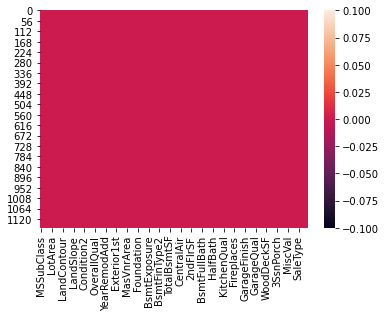

In [20]:
sns.heatmap(df.isnull())

No null values are present in the dataset now-

In [21]:
df.shape

(1168, 75)

and we are with 1168 rows and 75 columns in the dataset-

In [22]:
#exploring the categorical columns

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' = ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("***********************************************")
        print('\n')

MSZoning = ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
***********************************************


Street = ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
***********************************************


LotShape = ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
***********************************************


LandContour = ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
***********************************************


Utilities = ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64
***********************************************


LotConfig = ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
***********************************************


LandSlope = ['Gtl'

# Data Description-

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1168.0,70.988470,22.437056,21.0,60.00,70.988470,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.500000,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.000000,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.000000,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.000000,2004.00,2010.0
MasVnrArea,1168.0,102.310078,182.047152,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.500000,714.50,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.000000,0.00,1474.0


 We can observe that-

Most of the features have a mean that is greater than the median, indicating that the data is favourably skewed.

The standard deviation is larger in one or more attributes, indicating that the data is spread out.

A considerable gap between the maximum value and the third quartile for several features suggests the presence of an outlier.

A house's maximum SalePrice is 755000, while its minimum is 34900.

# Data Visualization-

Text(0.5, 1.0, 'Correlation with target variable SalePrice')

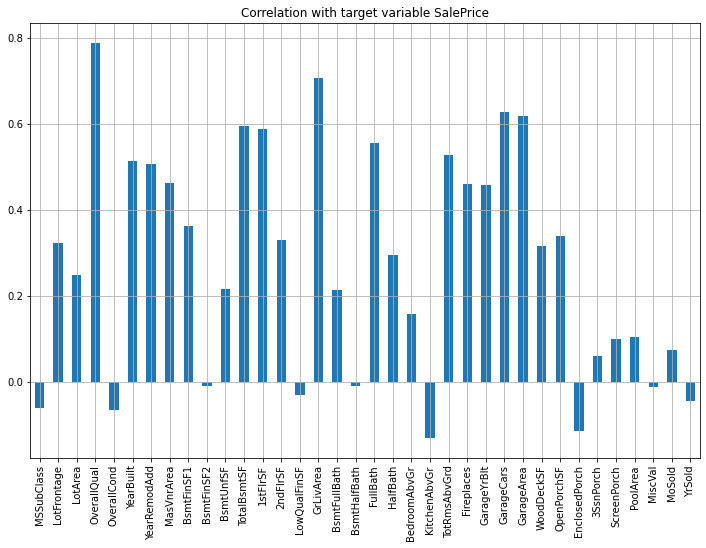

In [24]:
#checking the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
df.drop('SalePrice', axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable SalePrice")

observations-

OverallQual has the strongest positive correlation with SalePrice.

KitchenAbvGrd has the strongest negatively correlation with SalePrice.

# Univariate Analysis

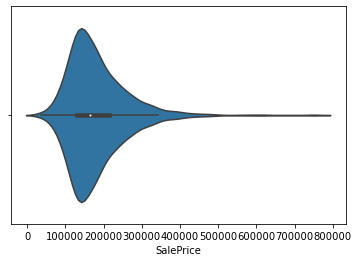

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [25]:
sns.violinplot(df['SalePrice'])
plt.show()
df['SalePrice'].value_counts()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

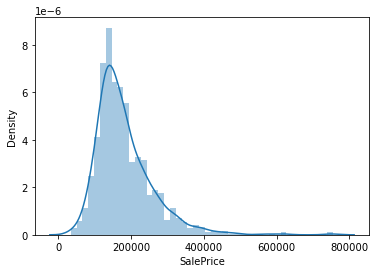

In [26]:
sns.distplot(df['SalePrice'])

Graph is normally distributed

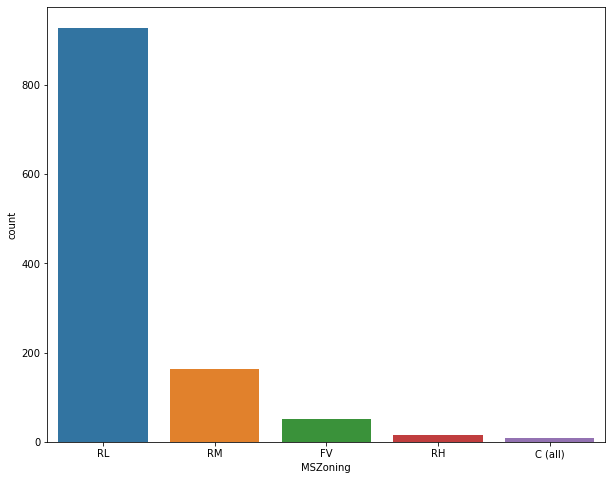

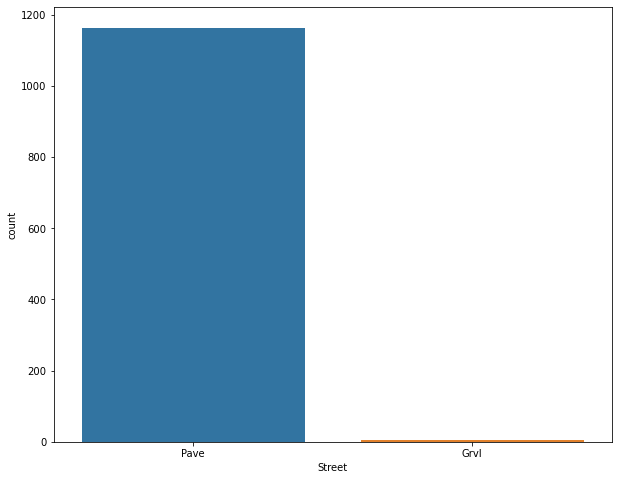

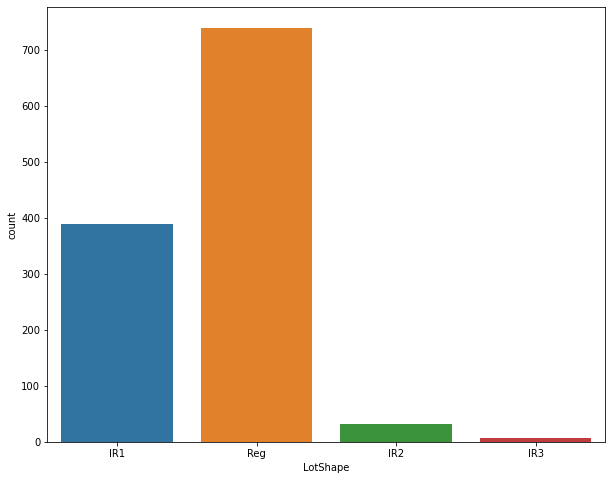

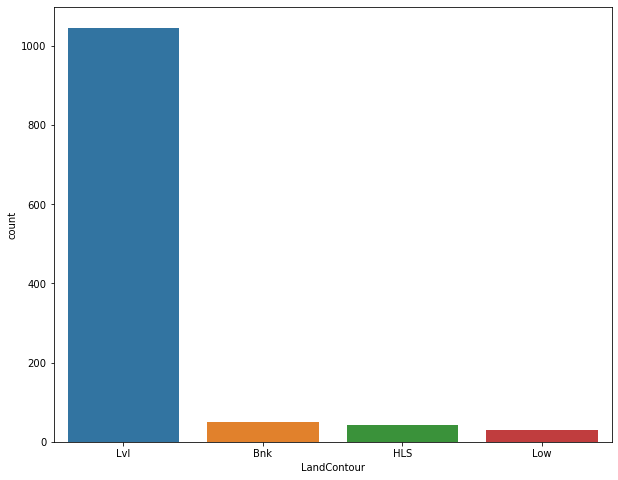

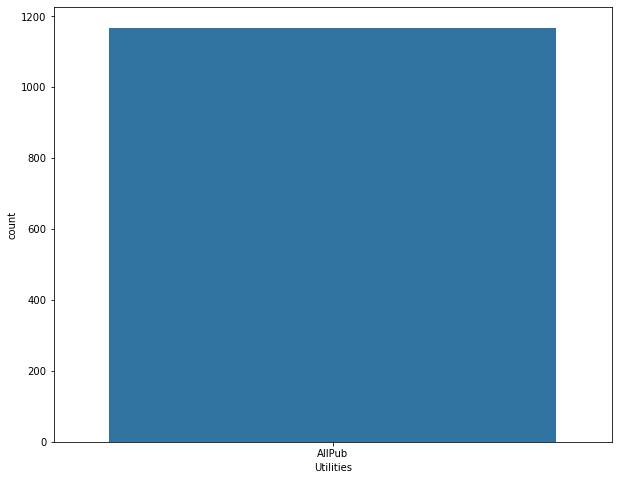

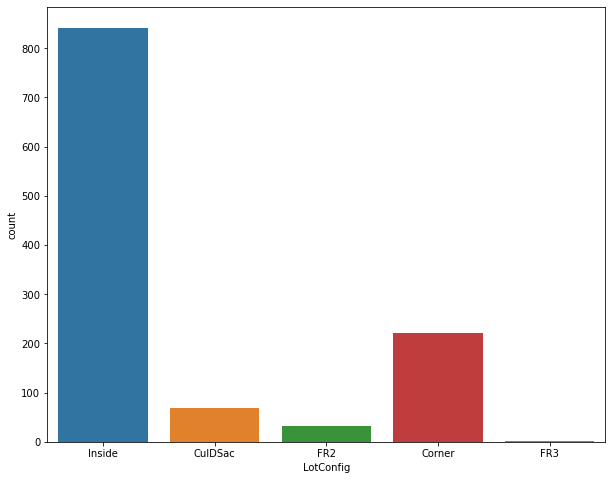

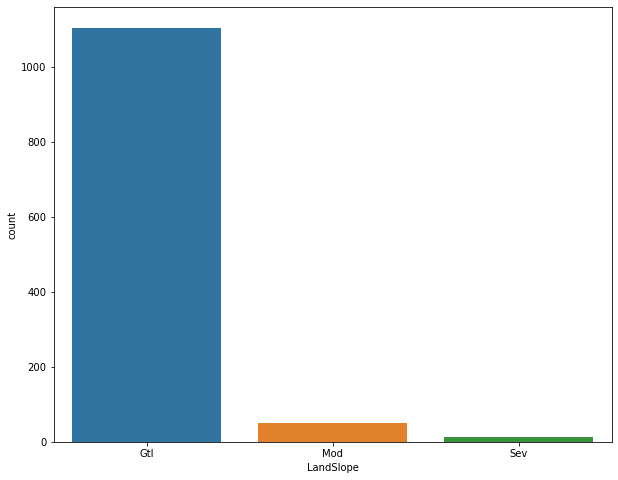

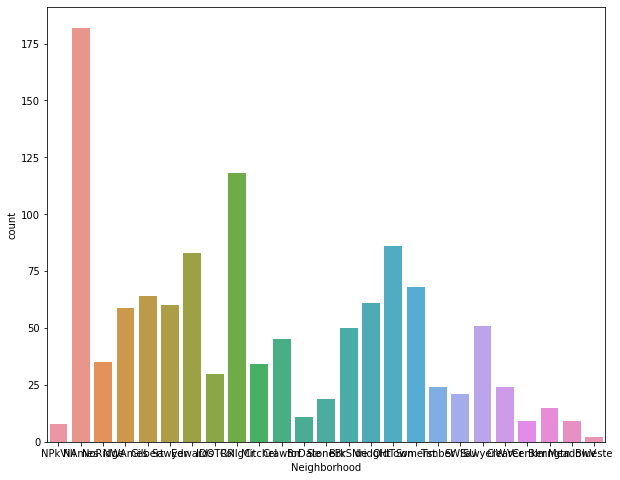

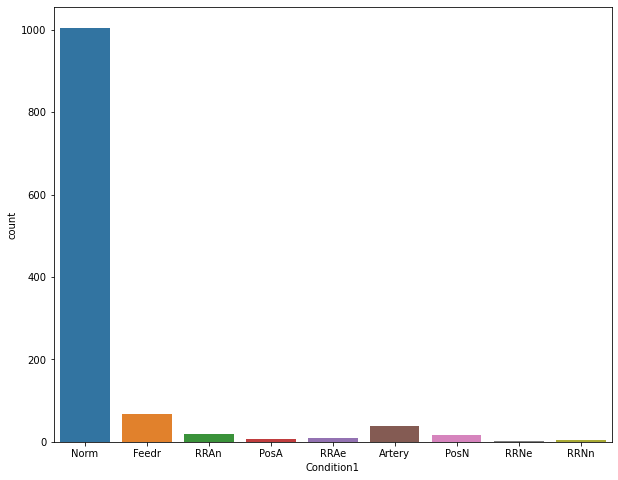

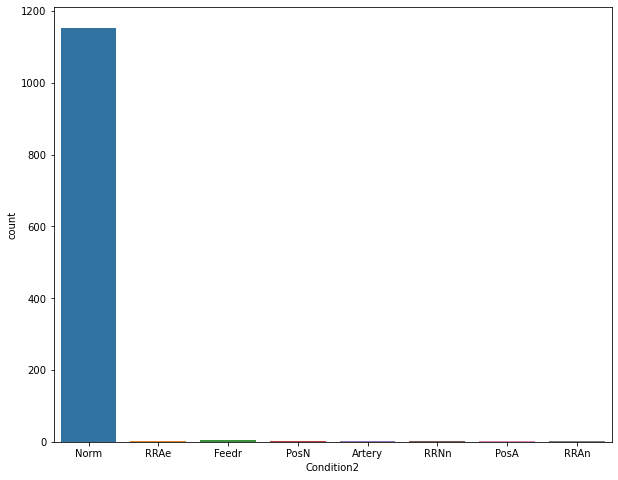

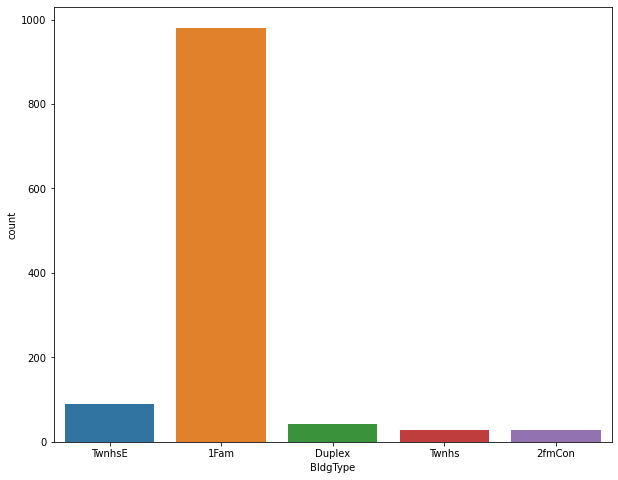

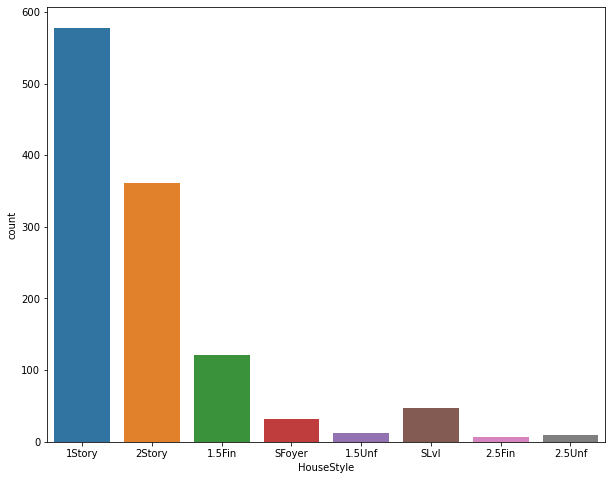

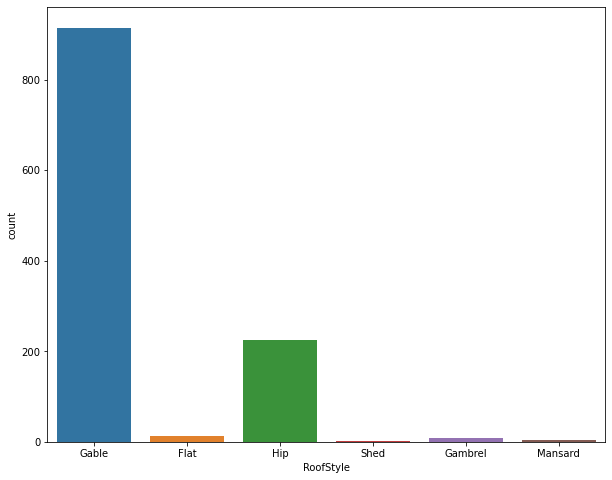

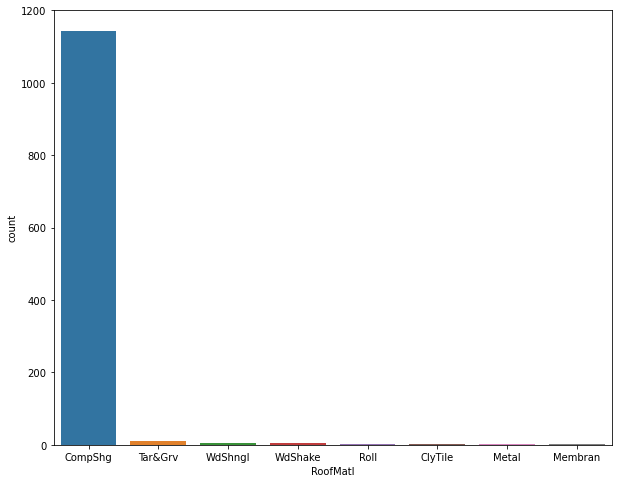

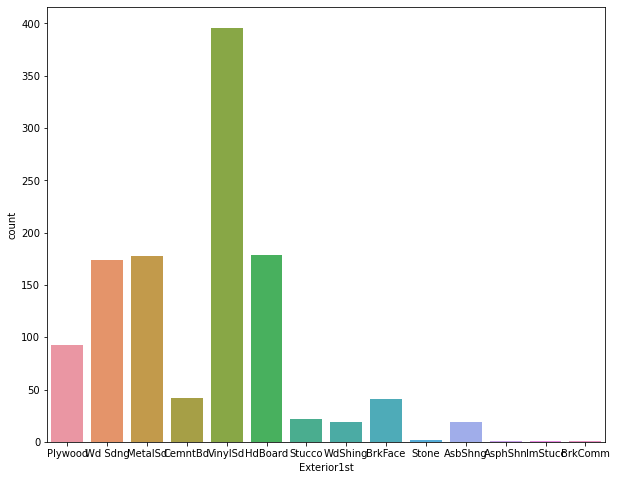

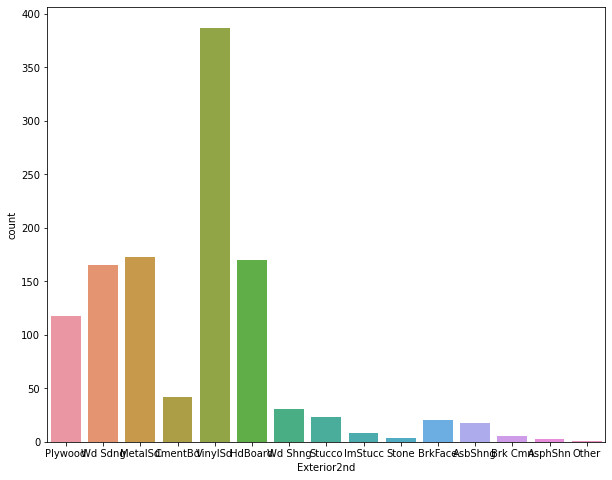

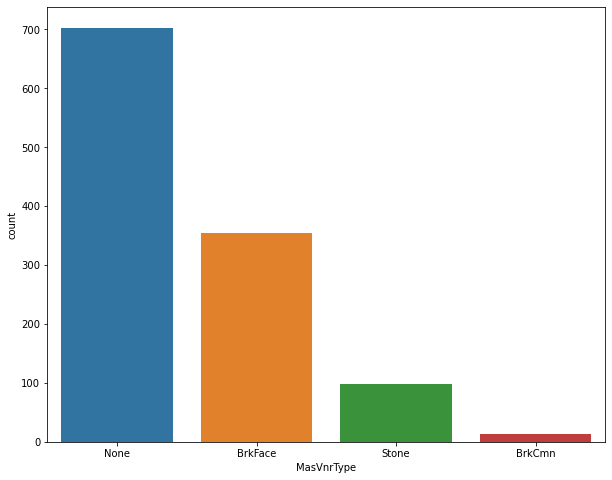

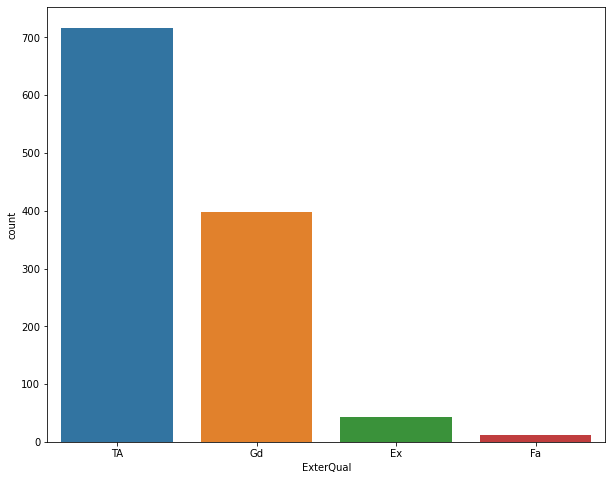

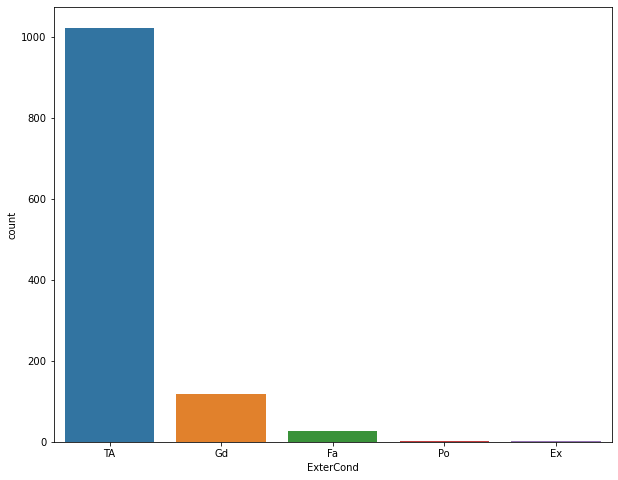

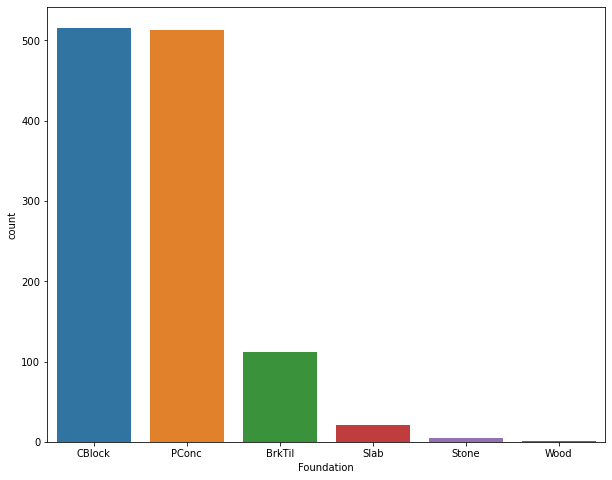

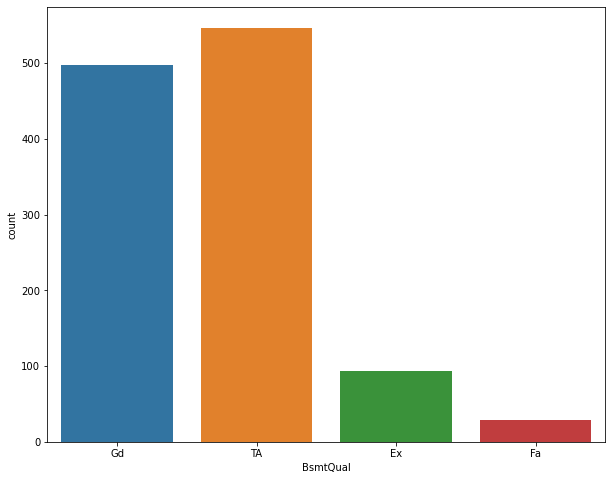

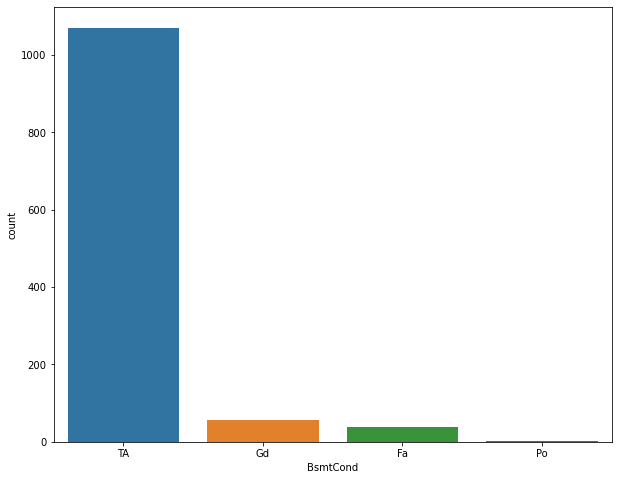

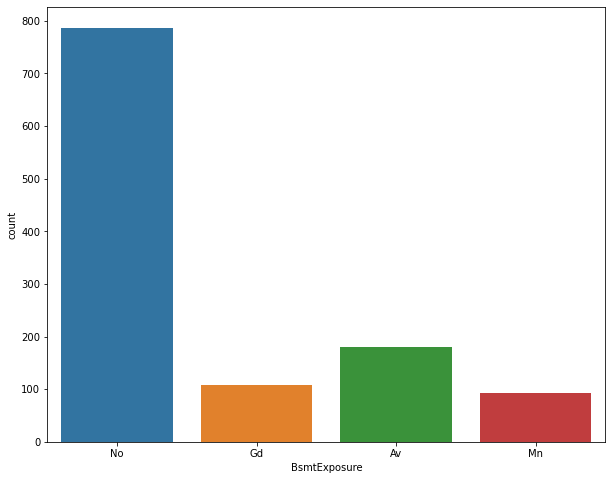

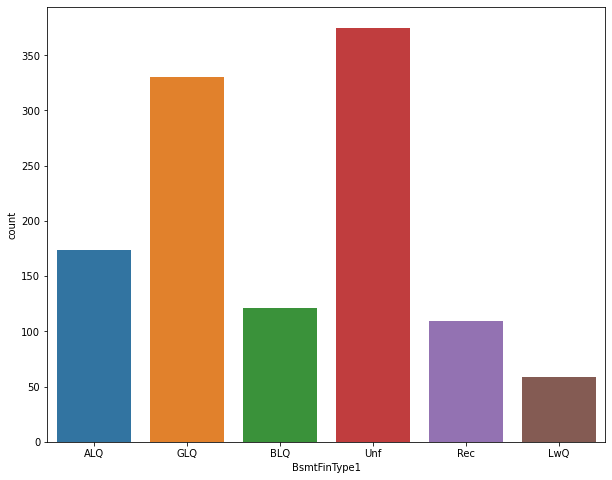

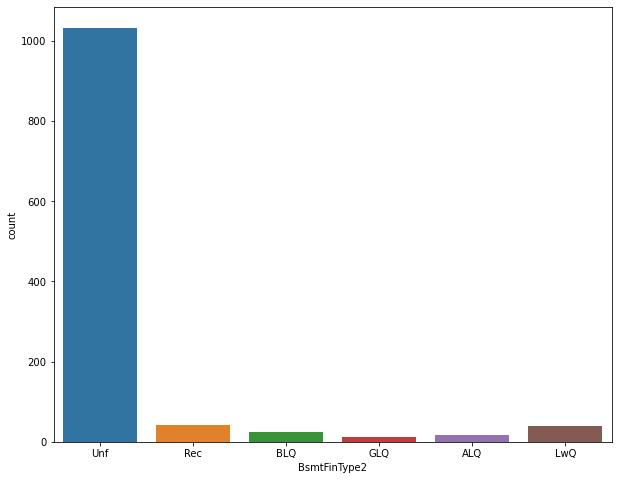

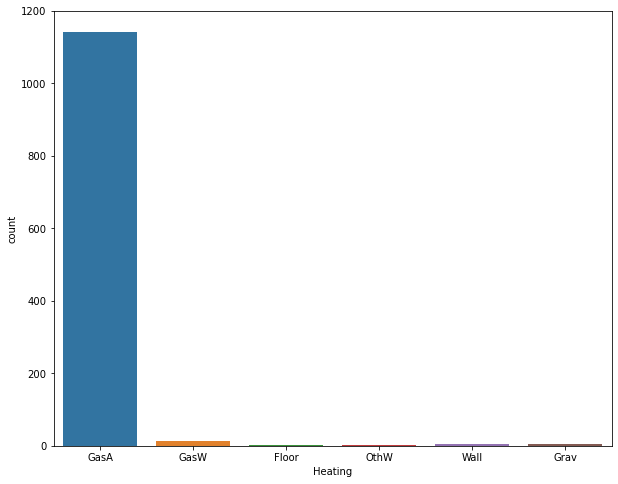

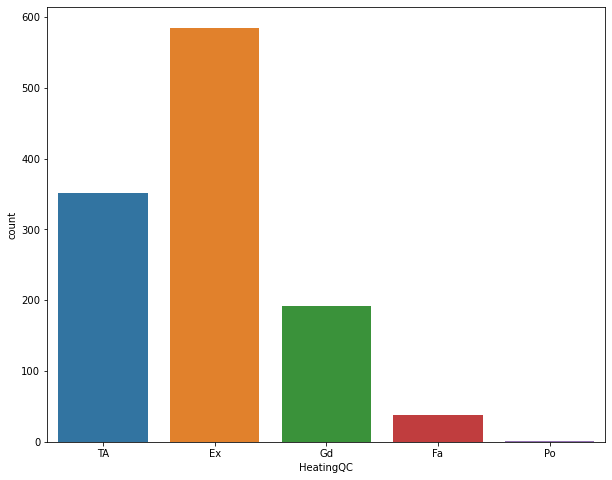

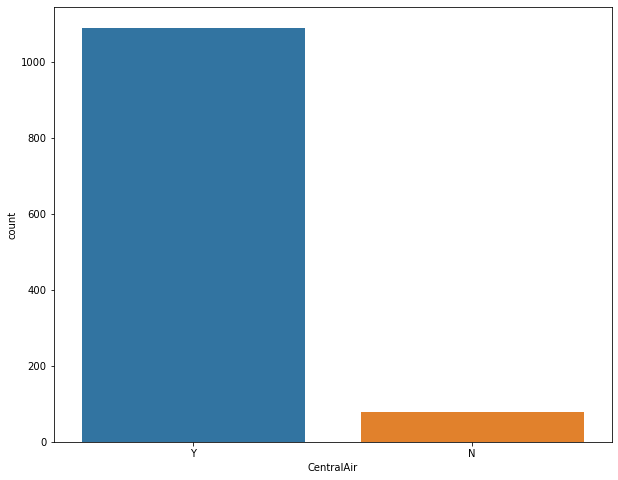

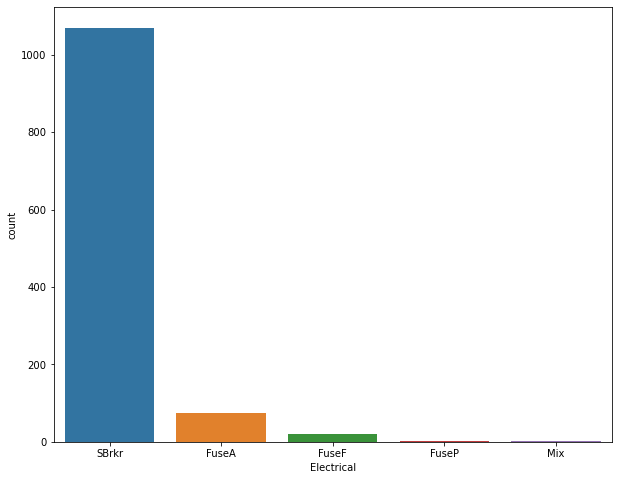

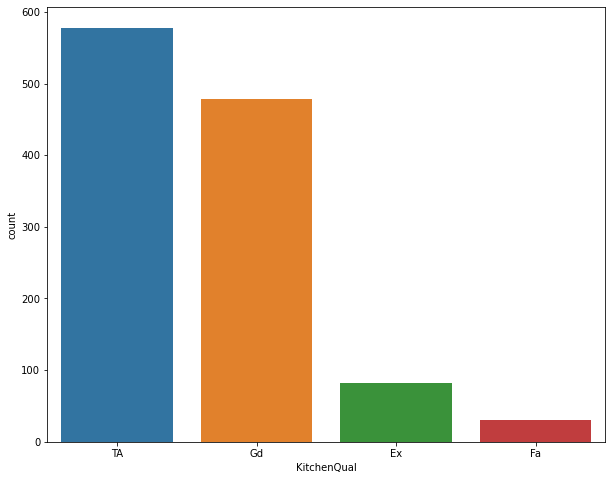

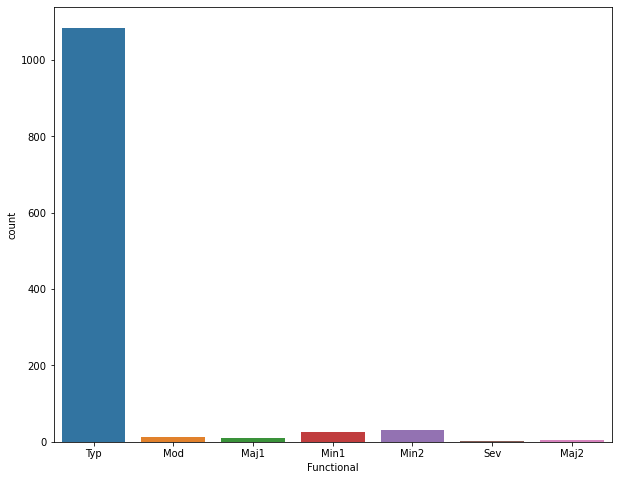

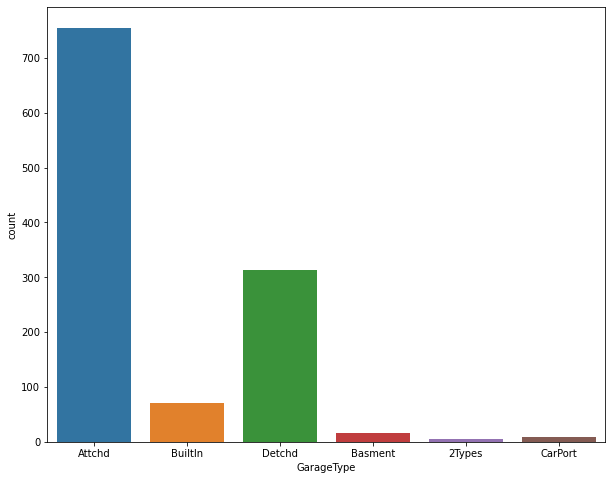

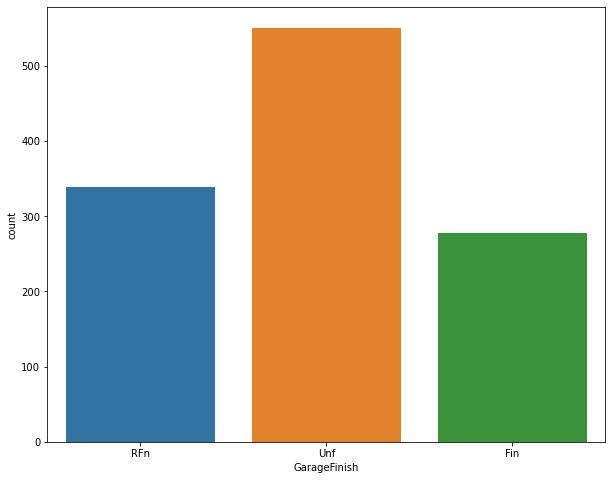

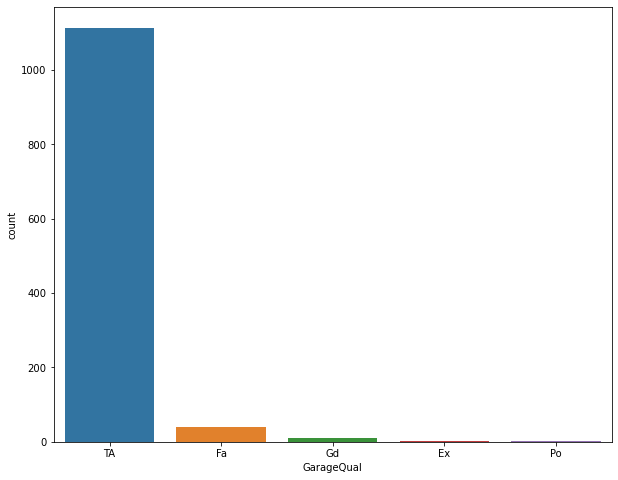

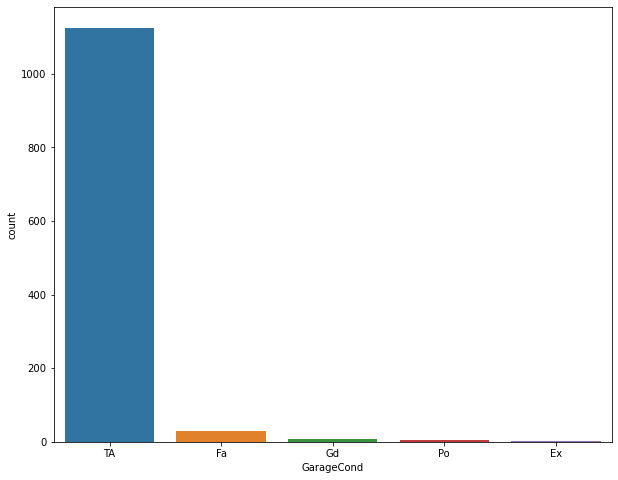

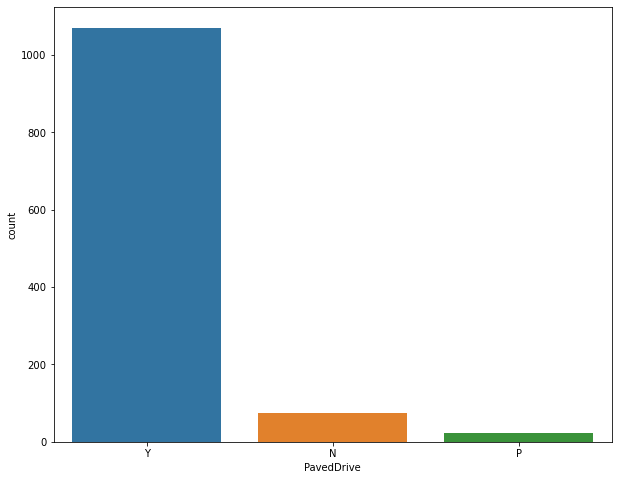

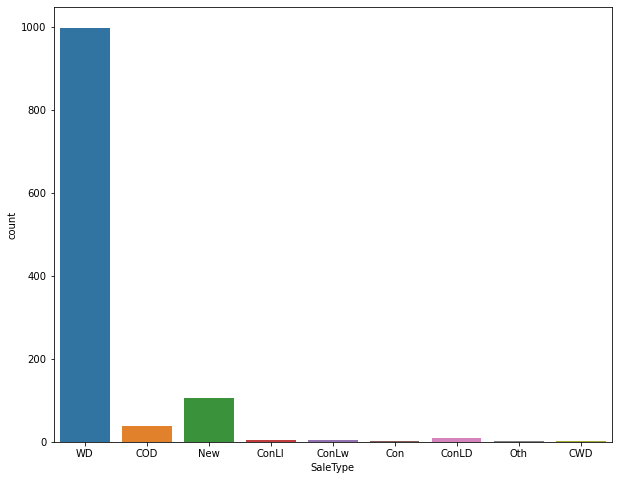

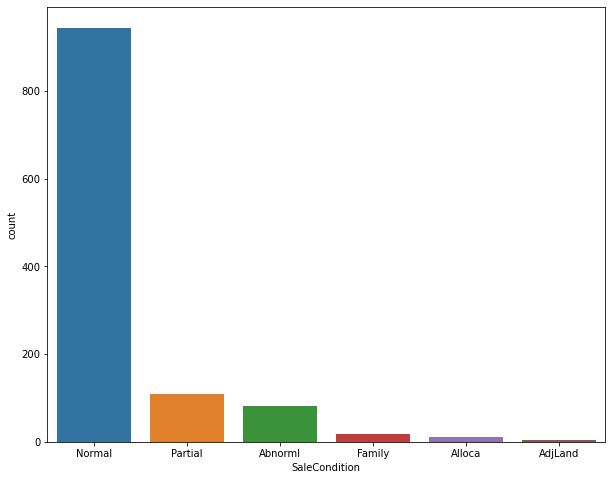

In [27]:
#for categorical columns-

object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    plt.figure(figsize=(10,8))
    sns.countplot(x=column,data=df)

 Some of the observations, we can notice-

1)MSZoning- Rl is highest

2)Pave street is highest numbers.

3)Reg is having the highest lotshape.

4)Landcolor is maximum by LVL

5)Utilities is having only one ALLPUB, we are going to drop this.

6)Lotconfig maximum inside.

7)gtl is having maximum landslope.

8)Names maximum neighbourhood.

9)Norm is highest condition1 & as well as condition2.

10)!Fam highest Bldg type

11)1story highest housing style.

12)Gable is most popular rpoofstyle.

13)Comphsgl is max roofmatl.

14)None maximum Masvnrtype.

15)Exterqual,Extercond,BsmtCond maximum by TA.

16)Unf is highest bsftfintype1 and bsftfintype2.

17)Normal is having highest sales condition.

18)Pavedrive yes maximum.

19)salescondition maximum by WD

20)Garagecond and garagequal maximum by TA.

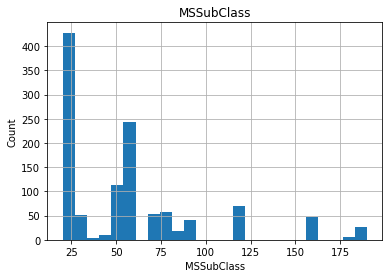

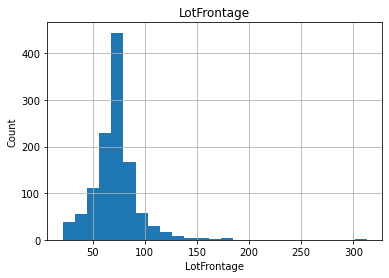

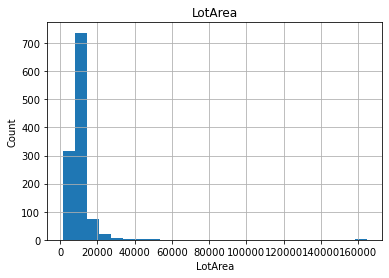

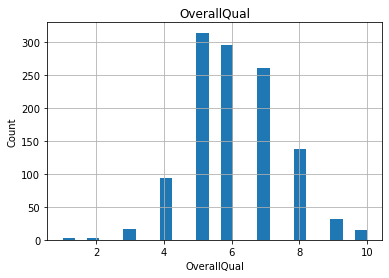

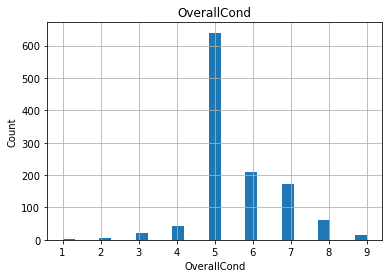

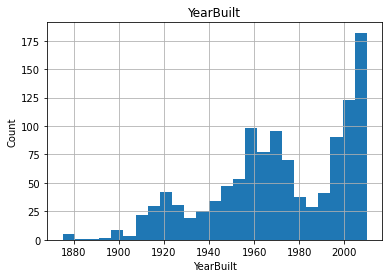

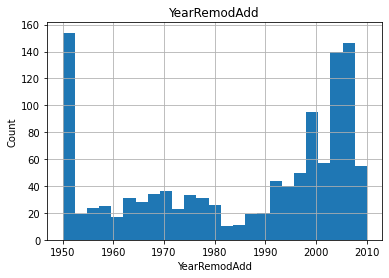

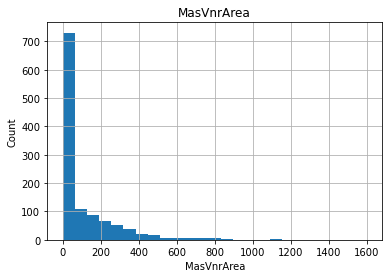

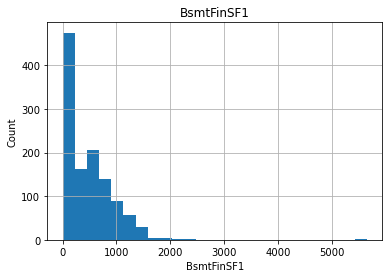

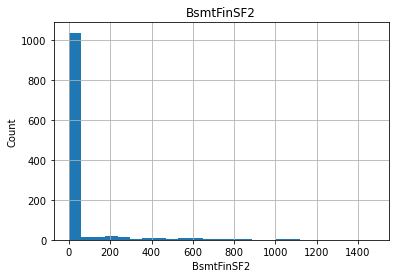

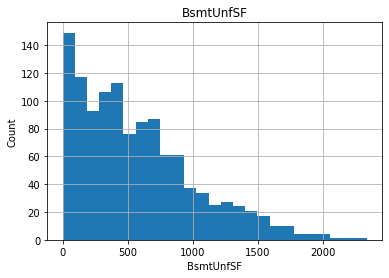

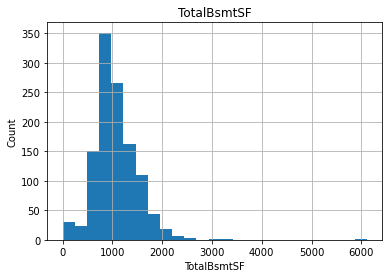

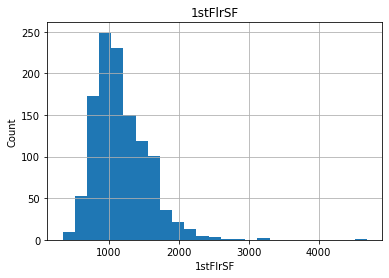

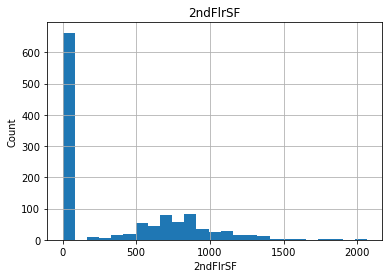

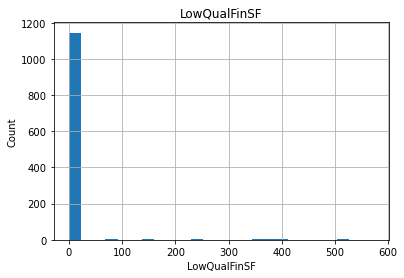

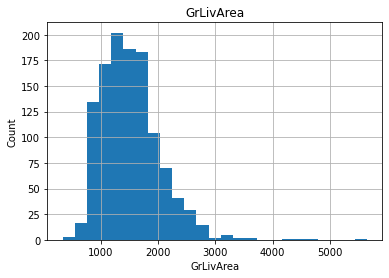

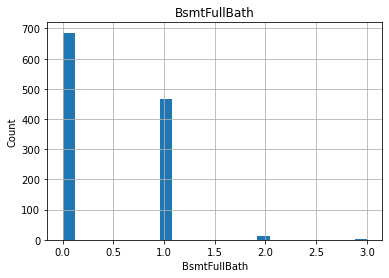

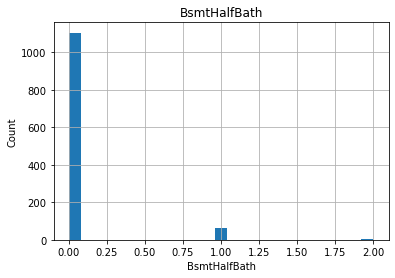

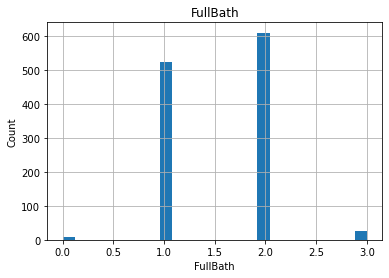

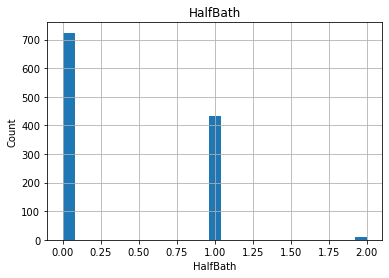

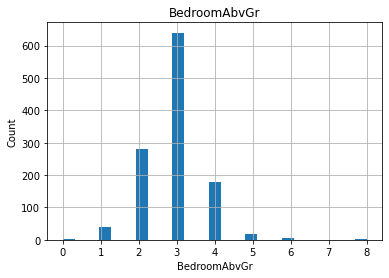

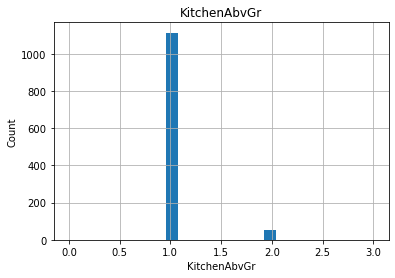

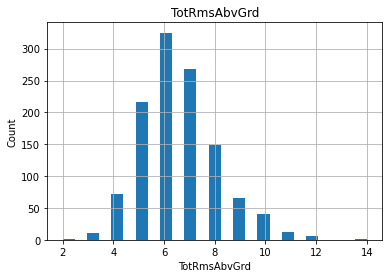

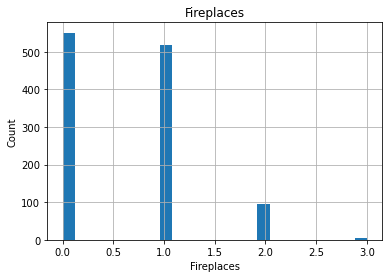

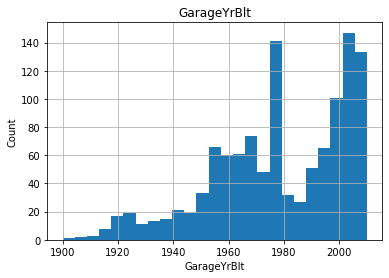

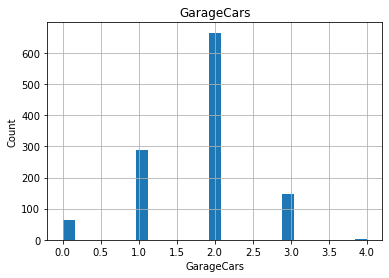

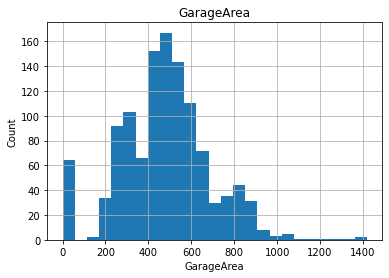

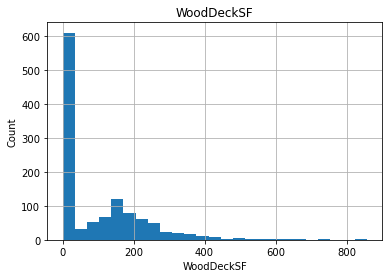

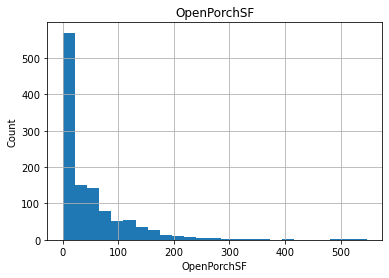

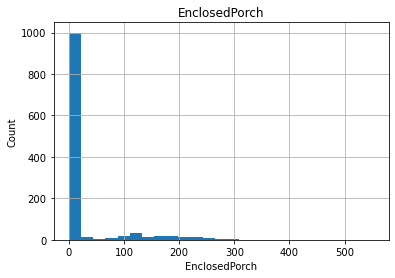

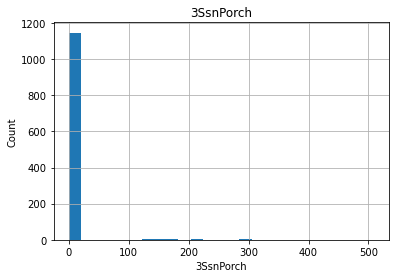

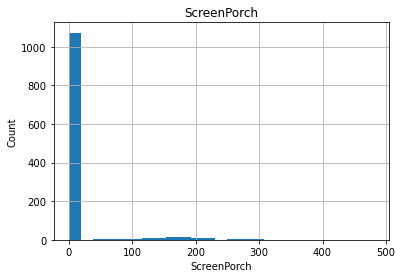

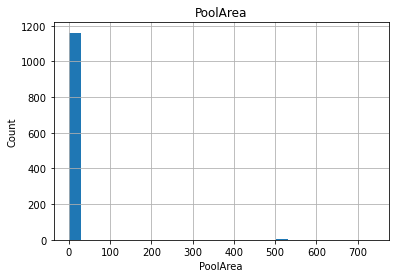

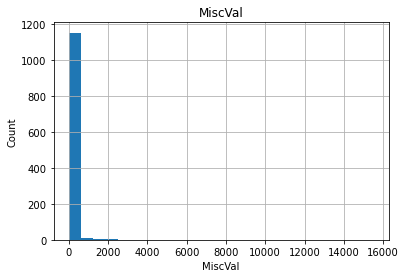

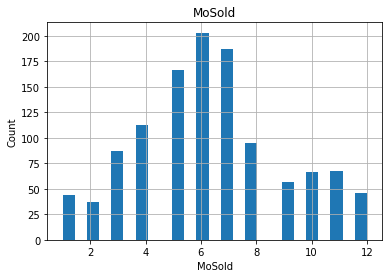

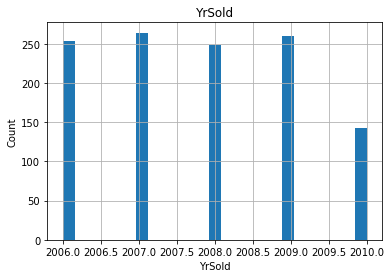

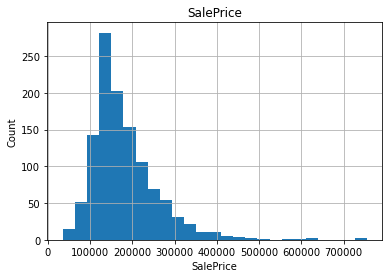

In [30]:
#Creating histogram of every numerical column

for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

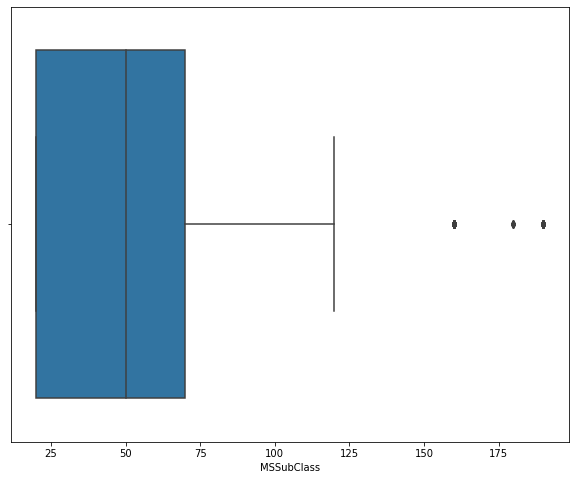

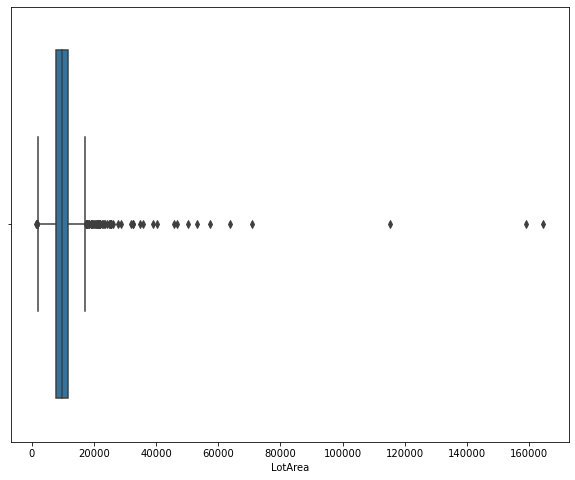

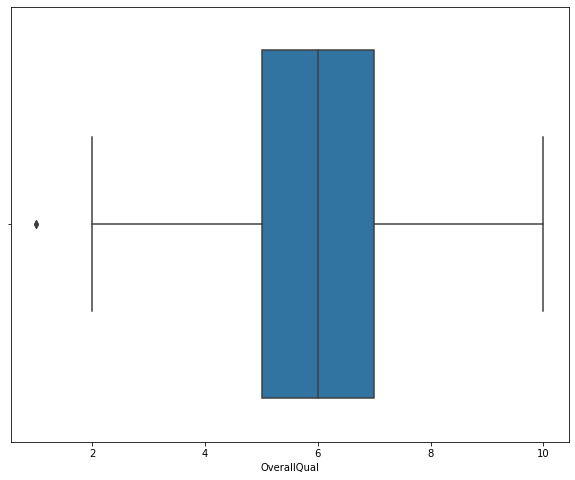

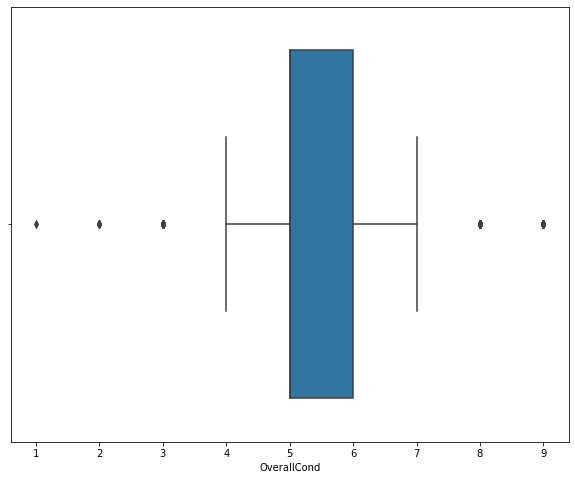

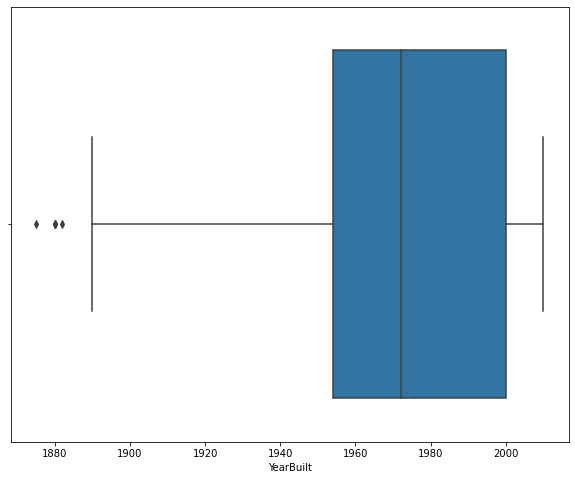

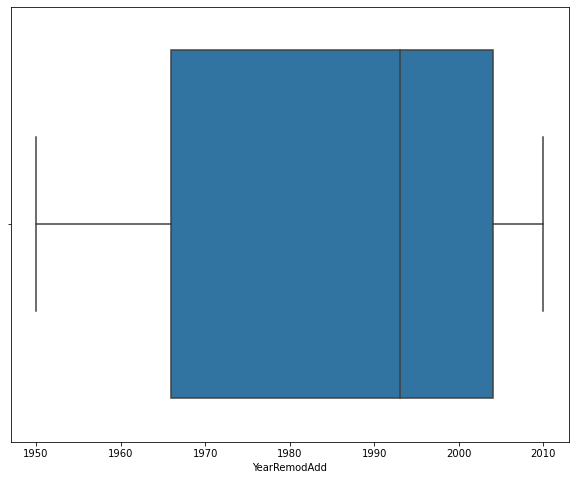

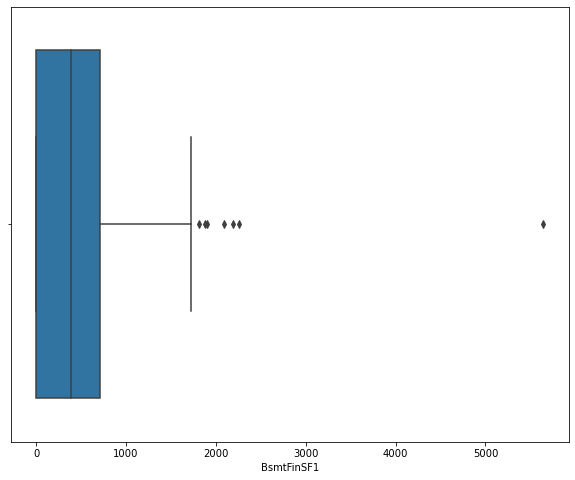

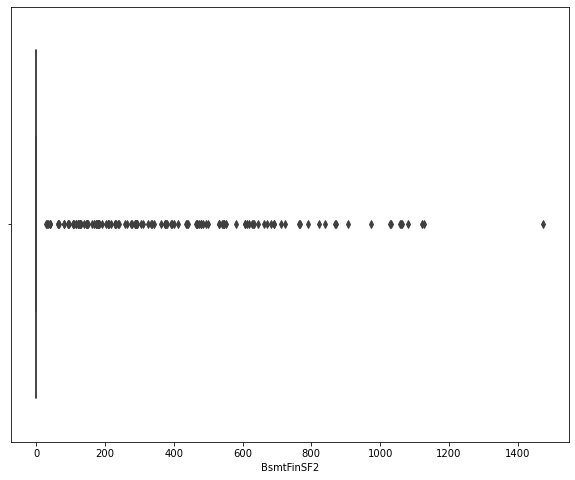

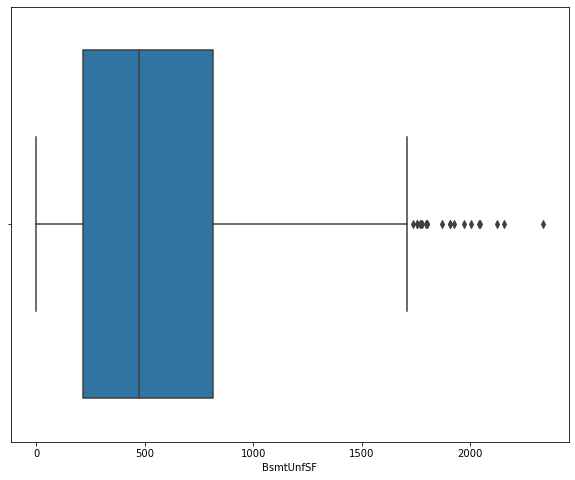

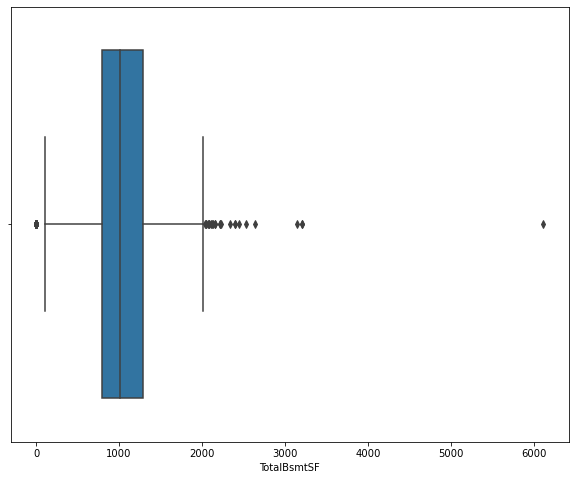

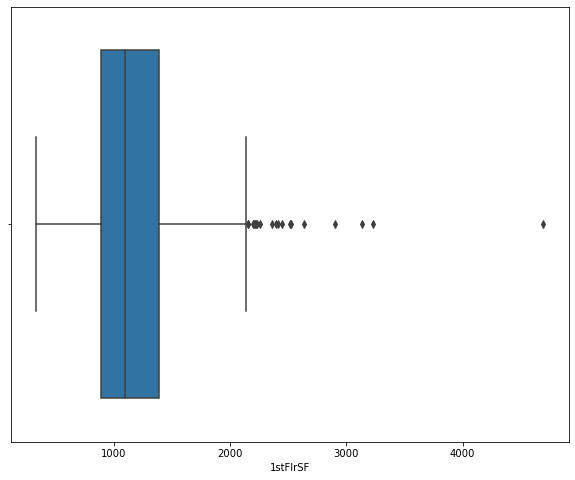

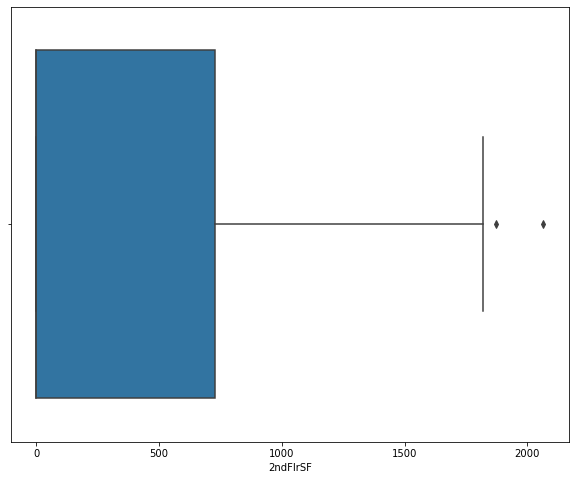

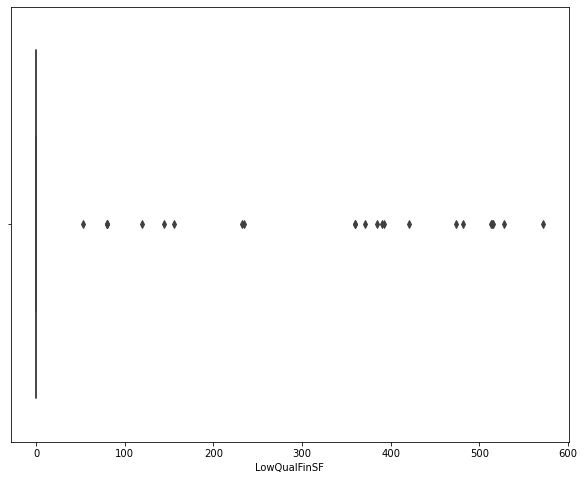

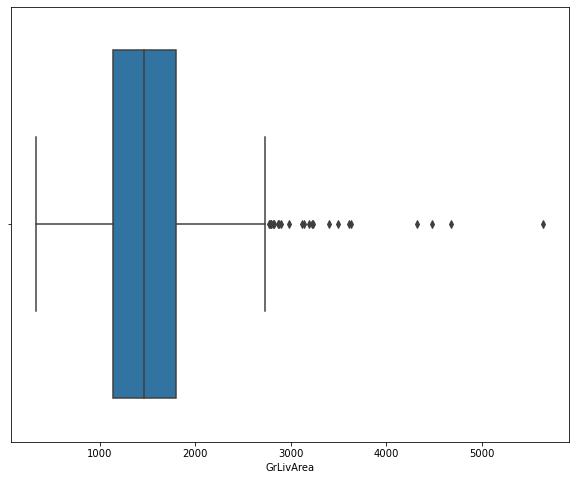

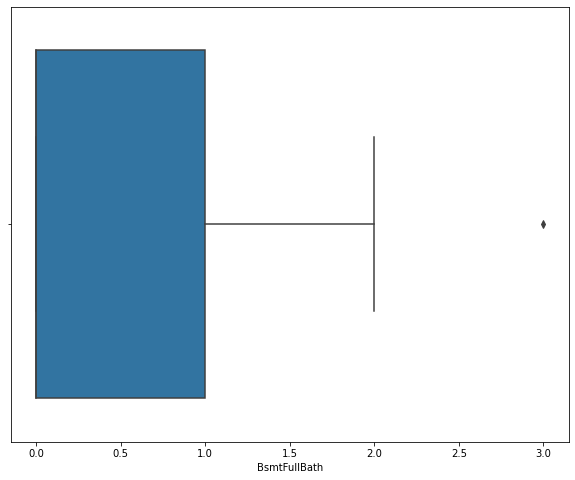

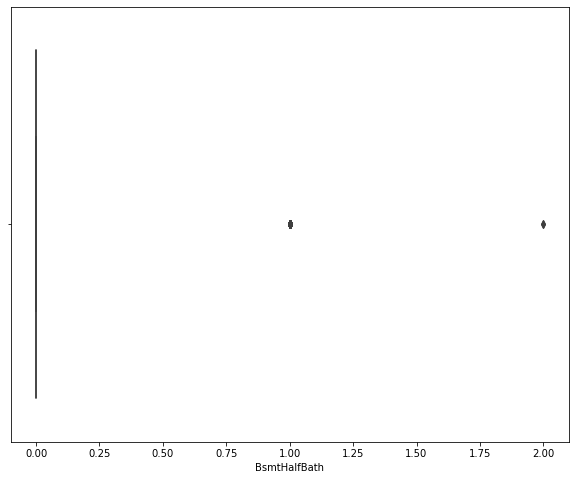

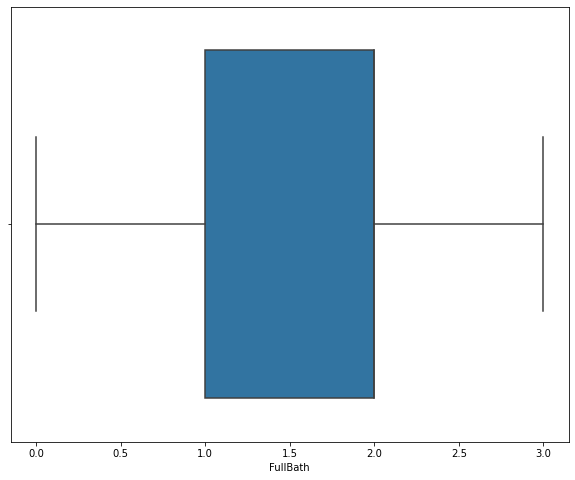

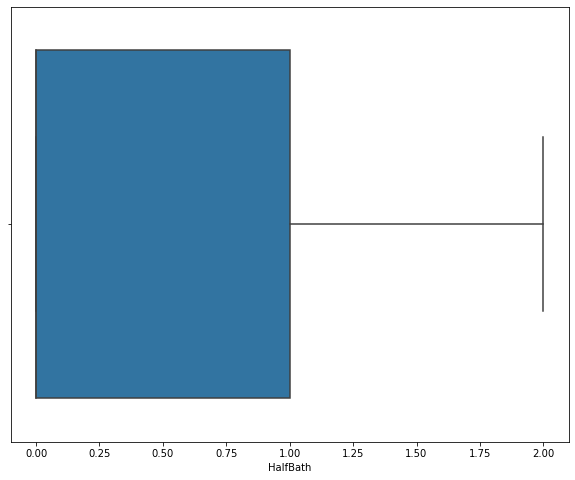

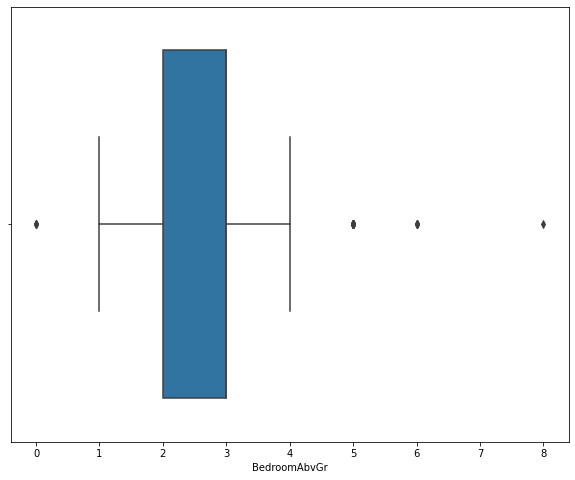

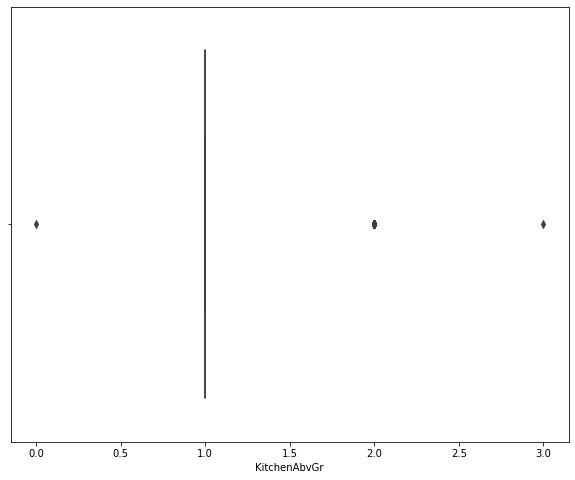

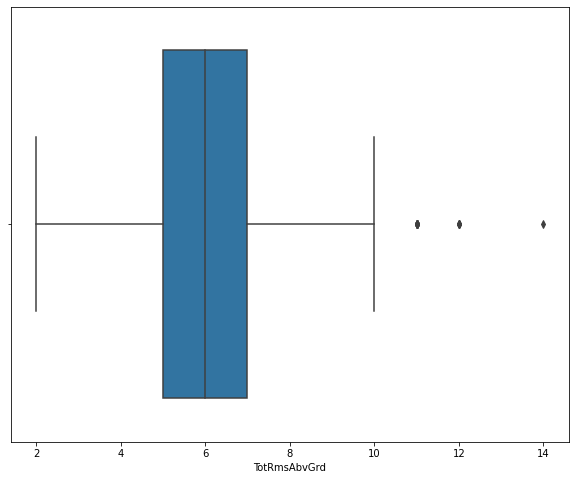

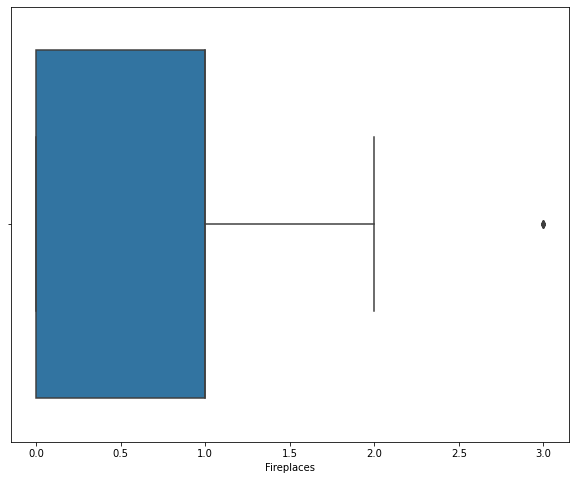

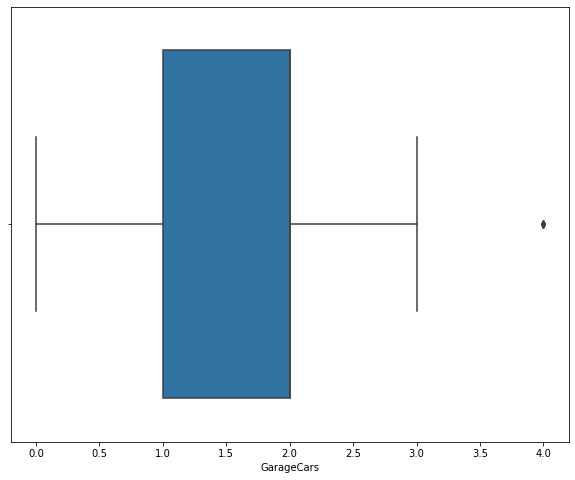

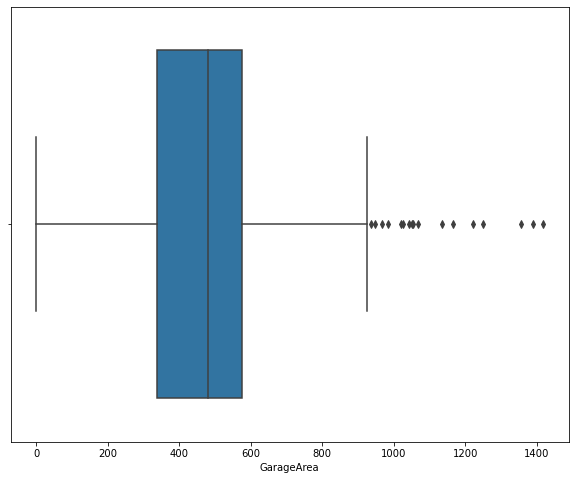

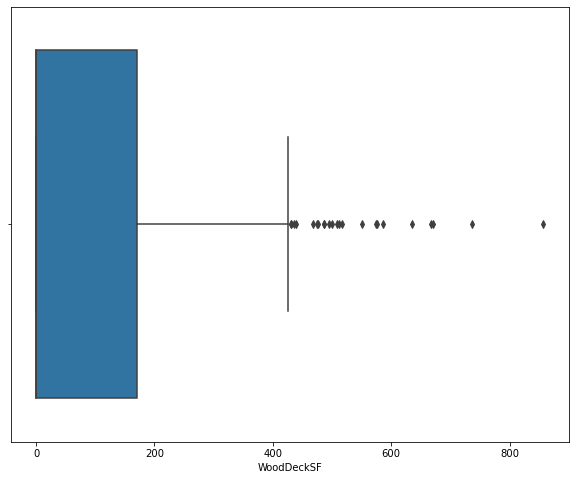

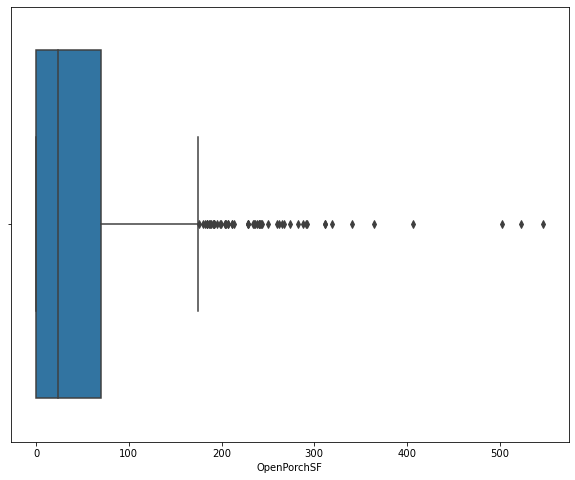

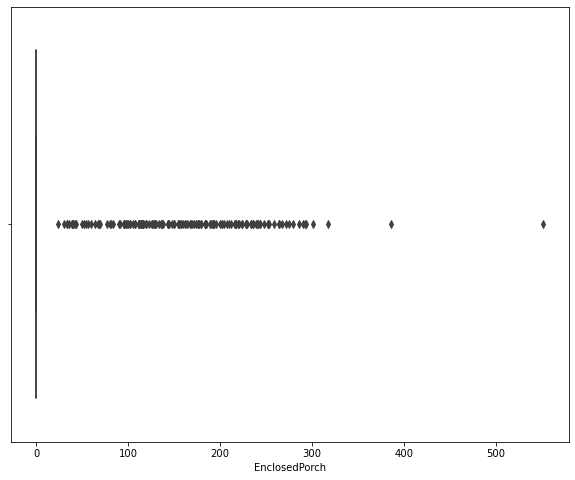

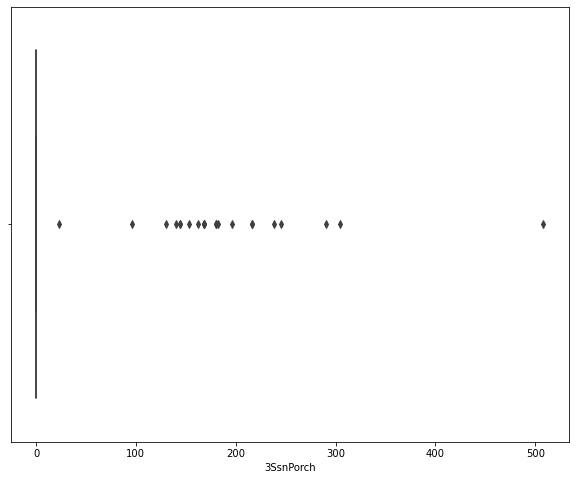

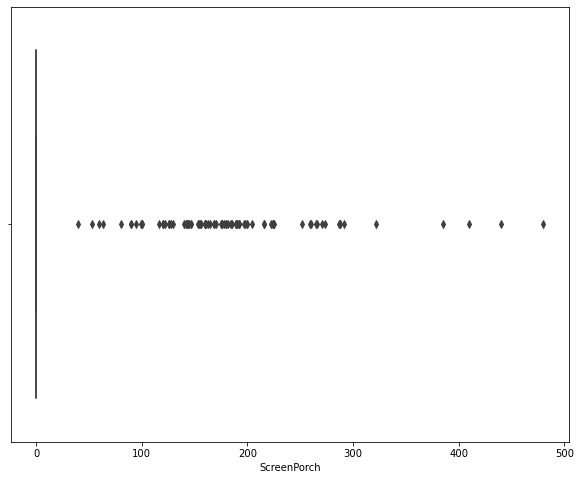

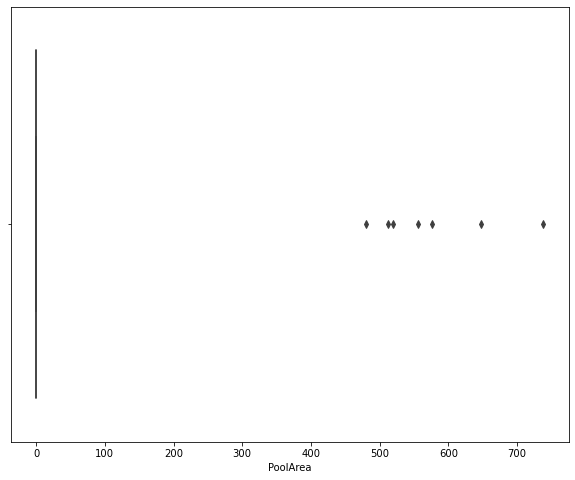

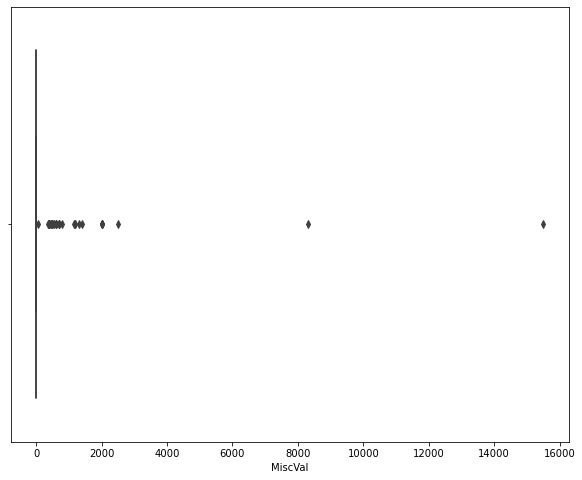

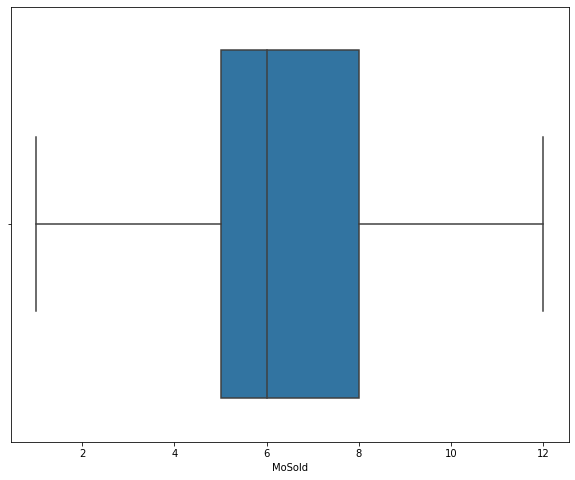

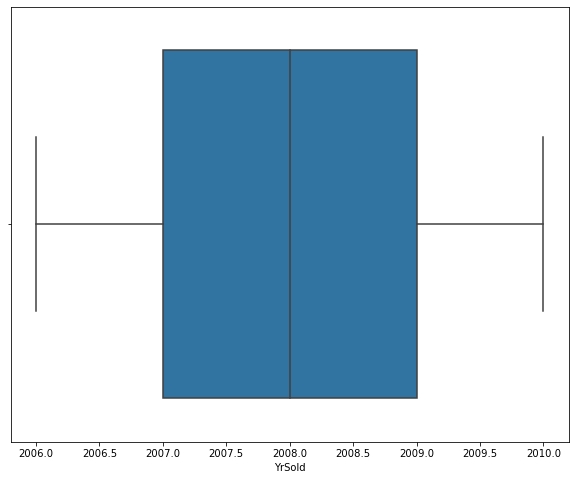

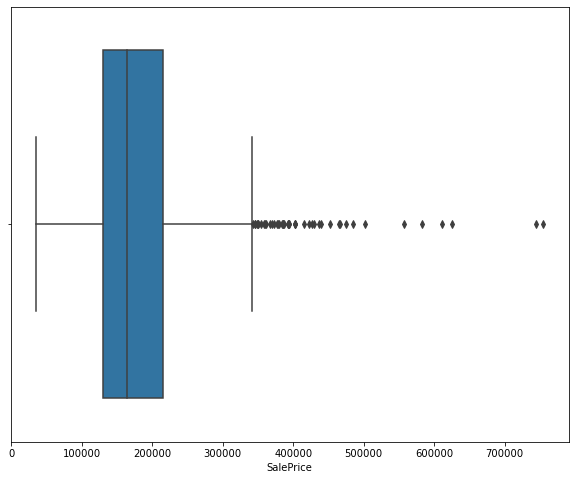

In [38]:
#for checking outliers present in continous featyres-

cont_columns = df.select_dtypes(include=(['int64']or['float64'])).columns

for column in cont_columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=column,data=df)

For most of them outliers are presenr in the dataset-

# Bivariate Analysis-

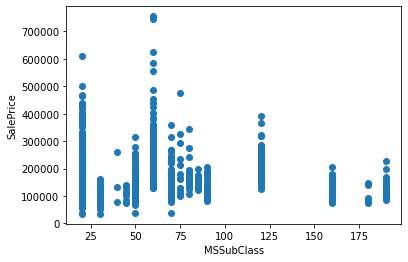

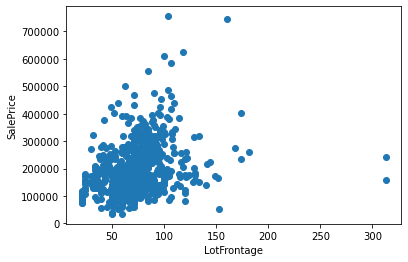

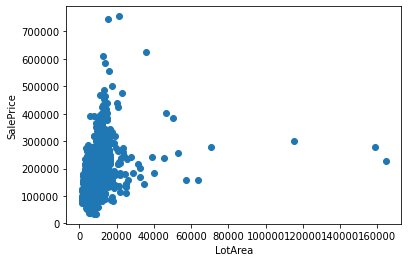

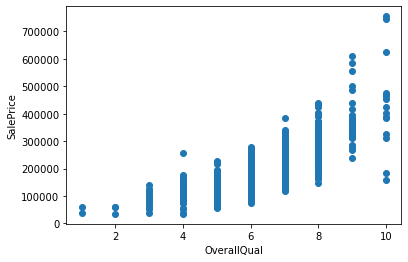

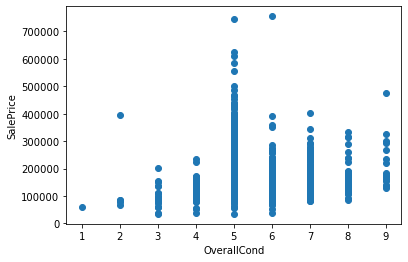

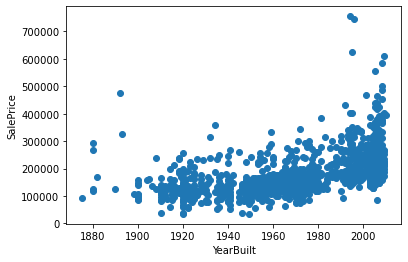

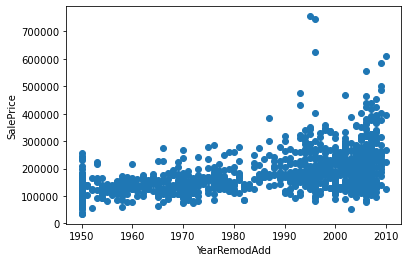

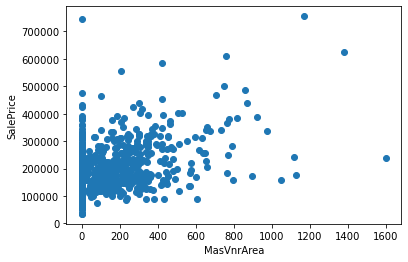

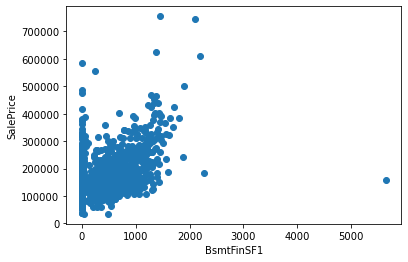

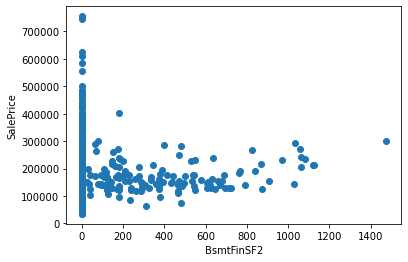

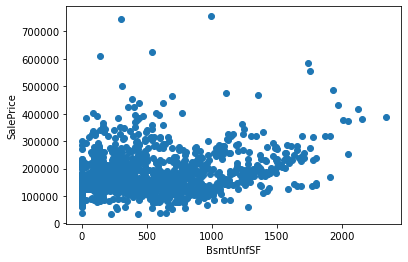

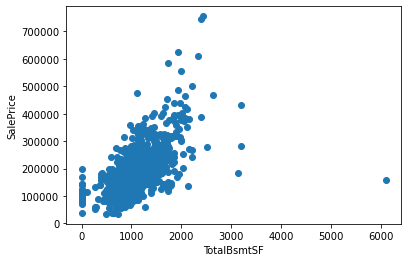

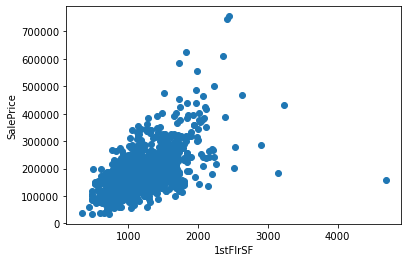

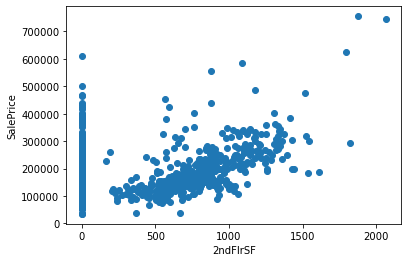

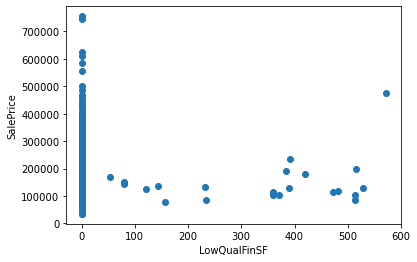

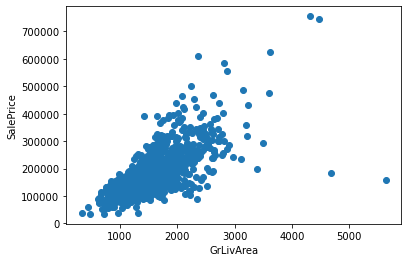

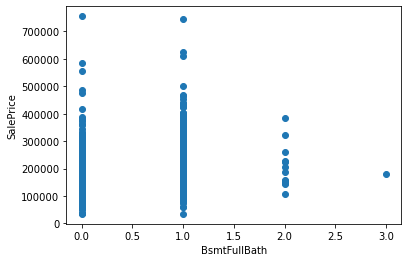

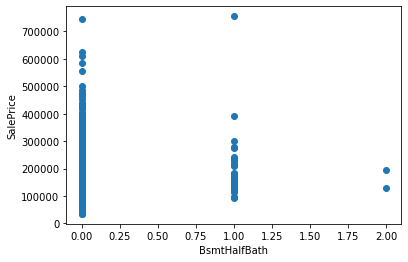

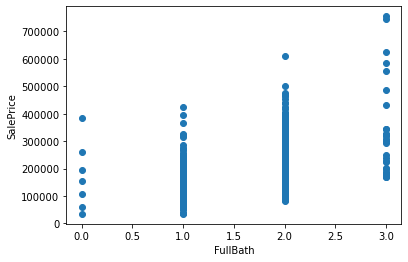

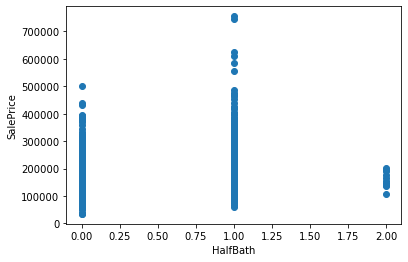

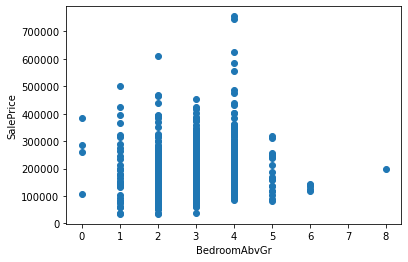

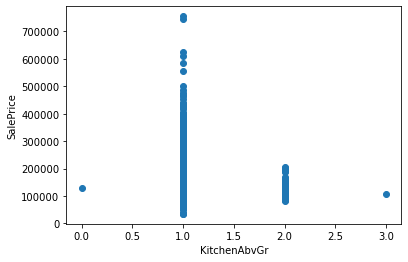

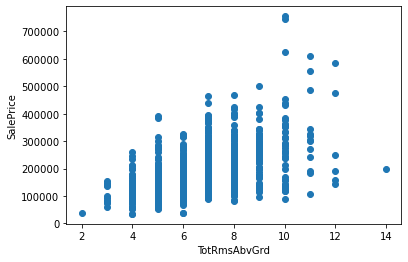

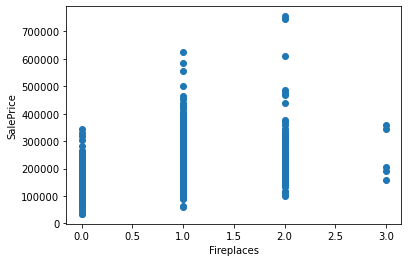

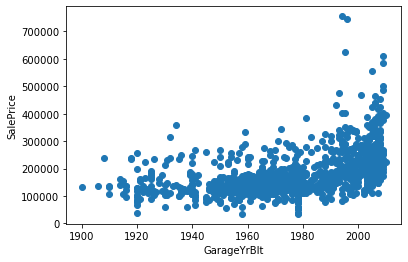

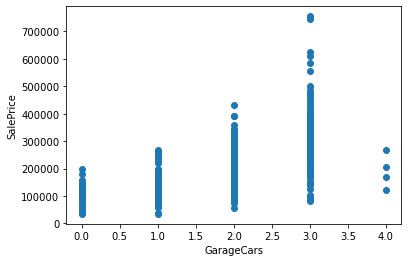

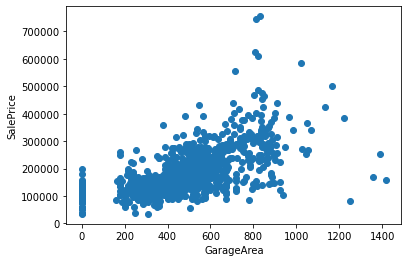

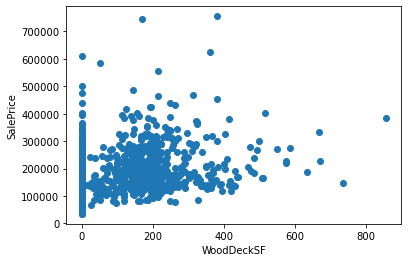

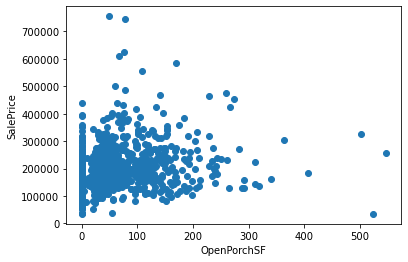

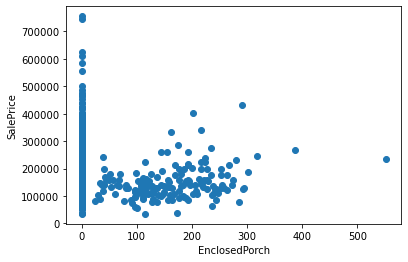

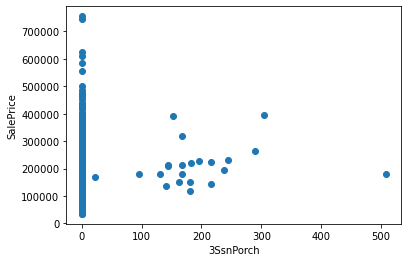

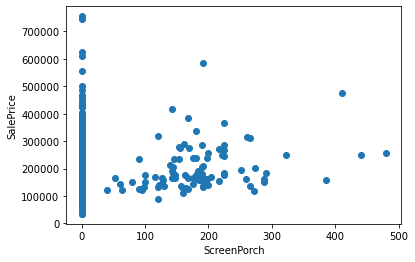

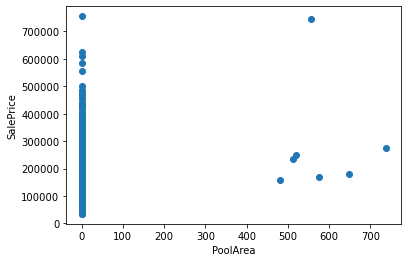

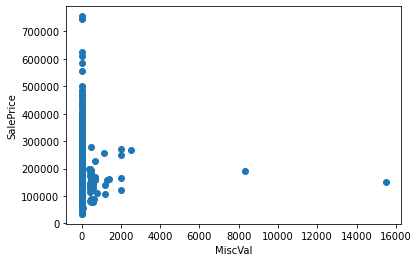

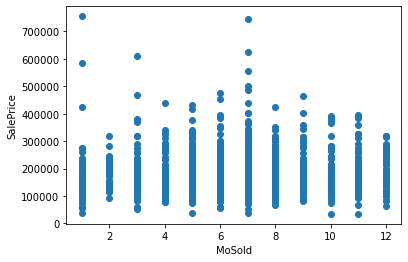

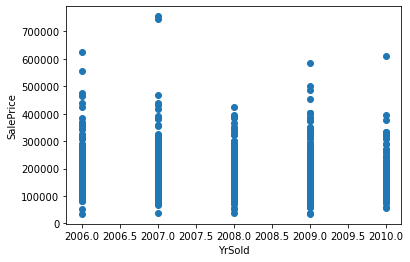

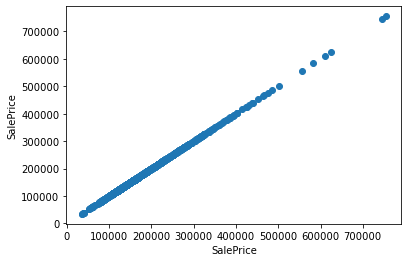

In [39]:
#plotting the Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

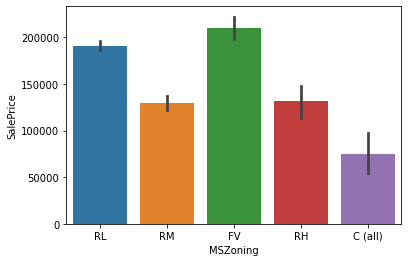

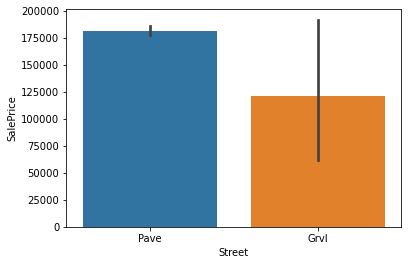

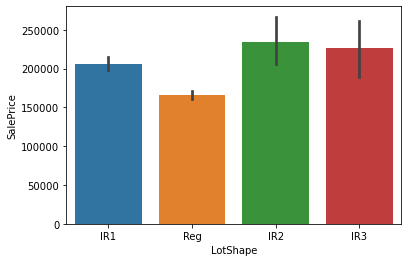

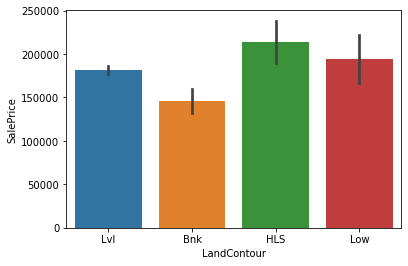

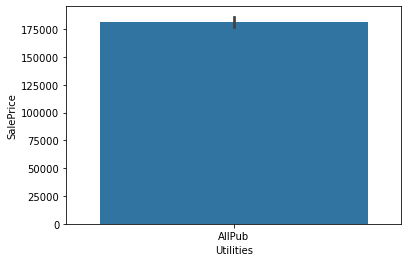

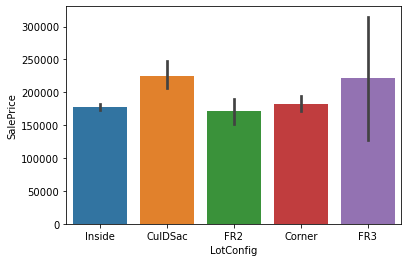

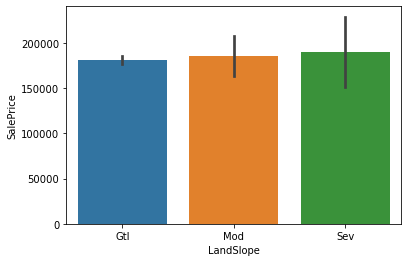

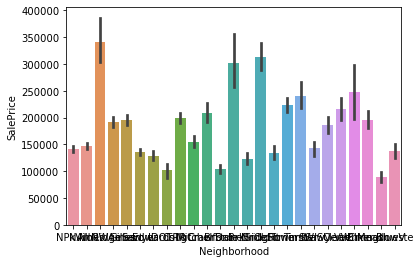

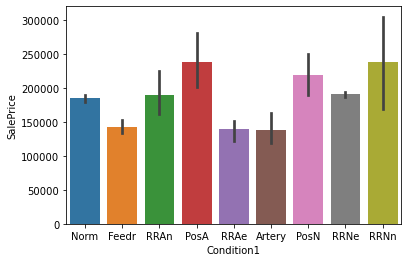

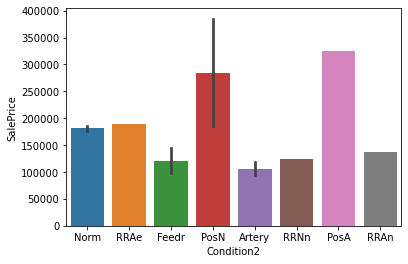

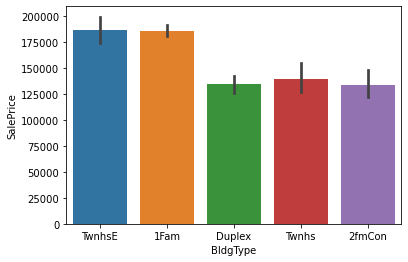

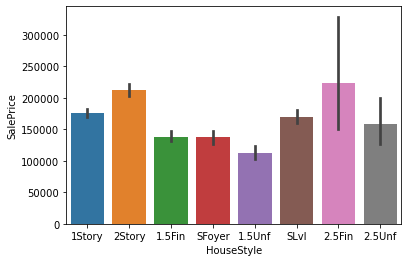

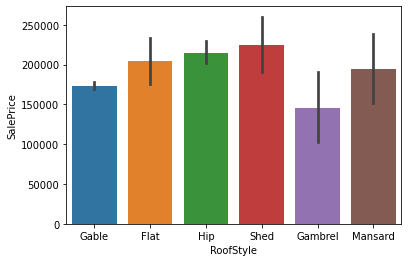

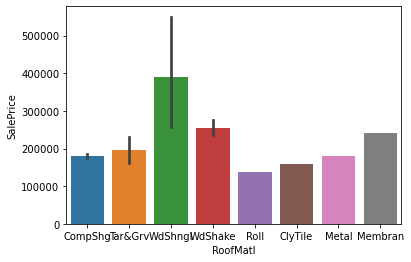

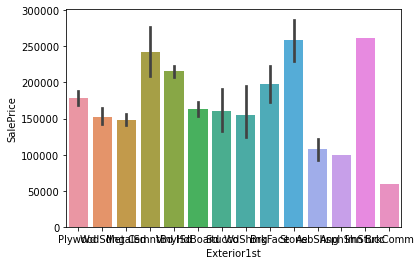

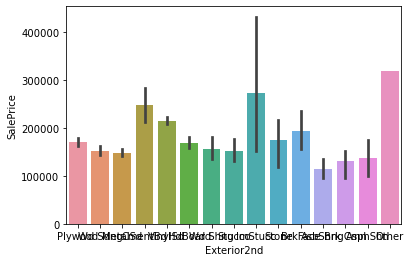

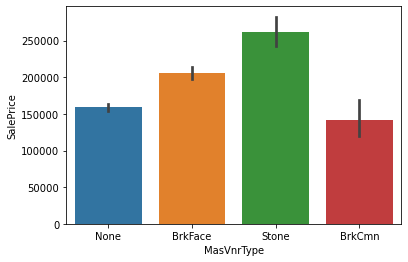

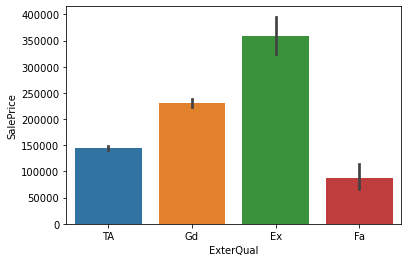

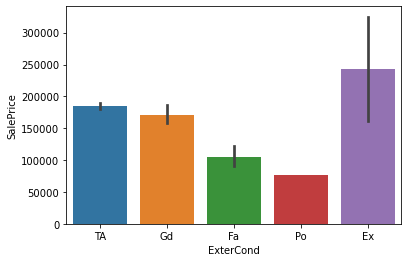

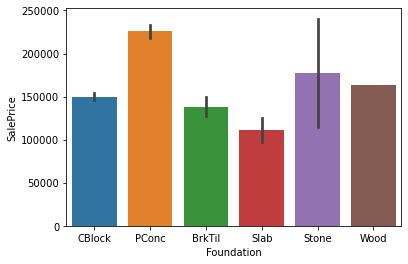

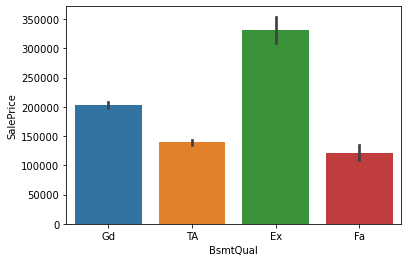

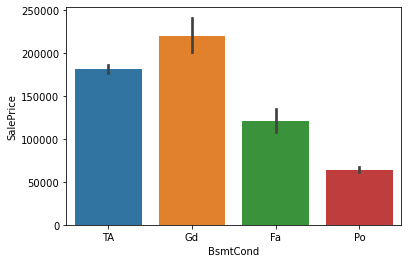

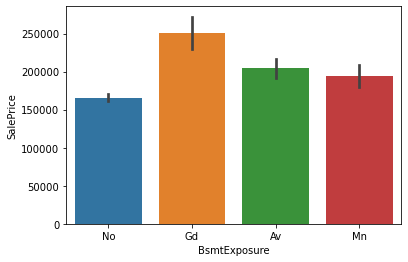

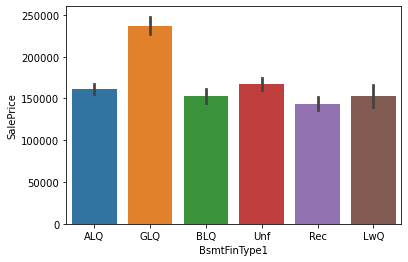

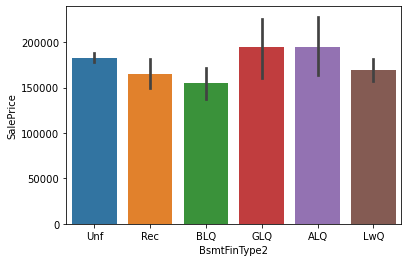

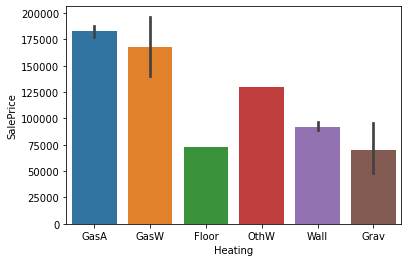

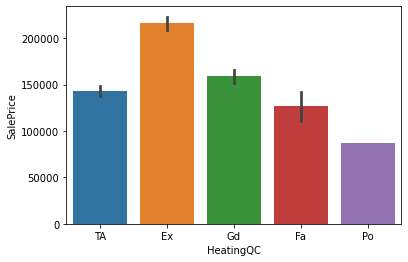

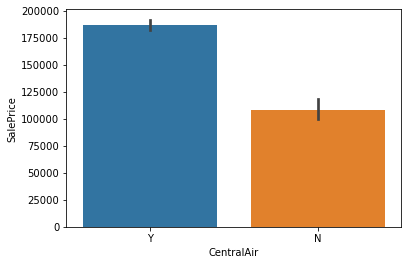

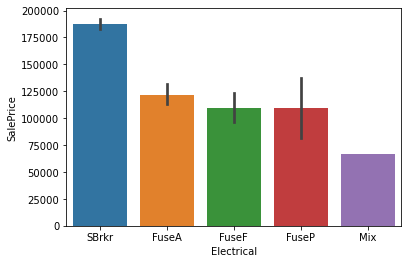

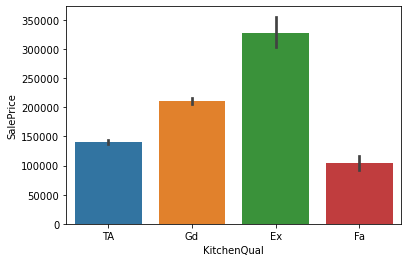

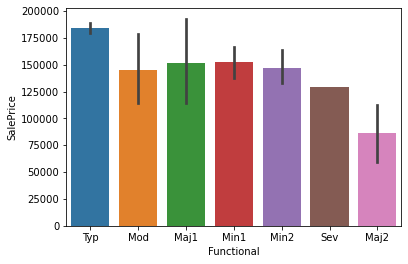

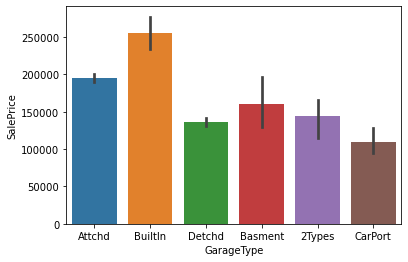

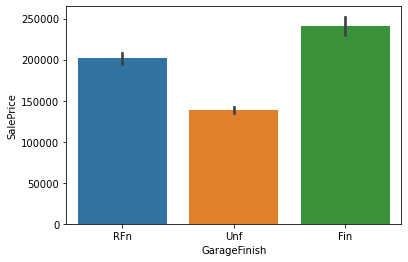

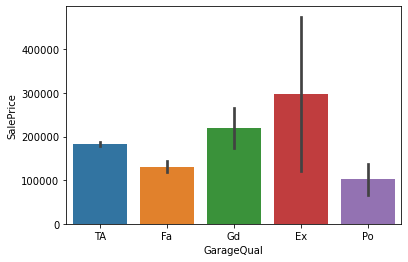

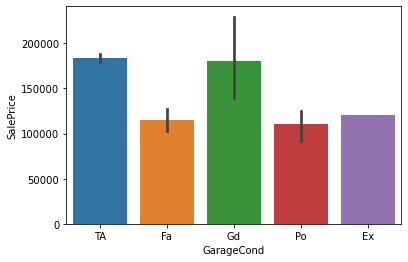

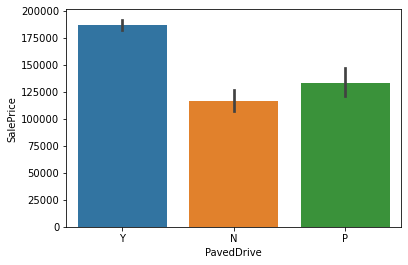

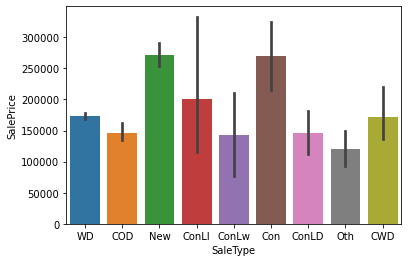

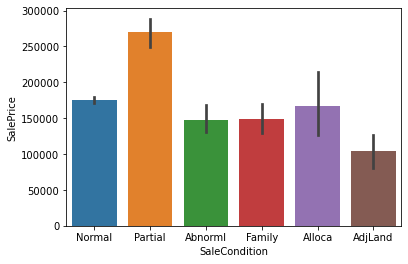

In [42]:
#plotting the bar-plot between all feature variables and target variable

obj_columns = df.select_dtypes(include=['object']).columns

for col in obj_columns:
    data=df.copy()
    sns.barplot(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

observations-

1)for feature MSZoning vs SalePrice-

MSZoning has the greatest SalePrice with FV, but the lowest SalePrice with C(all).

2)for feature Street vs SalePrice-

The street with the highest SalePrice is Pave, while the street with the lowest SalePrice is Grvl.

3)for feature LotShape vs SalePrice-

LotShape has the highest SalePrice with R2 and R3, whereas Reg has the lowest SalePrice.

4)for feature LandContour vs SalePrice-

The greatest SalePrice is on LandContour with HLS, while the lowest SalePrice is on LandContour with Bnk.

5)for feature LotConfig vs SalePrice-

LotConfig has the greatest SalePrice with CulDSac and FR3, and the lowest SalePrice with FR2.

6)for feature Landslope vs SalePrice-

The SalePrice of LandSlope with Sev, Mod, and Gtl is practically identical.

7)for feature neighbourhood vs saleprice-

Neighborhood with NoRidge, NodgHt and StoneBr has highest SalePrice while with MeadowV has lowest SalePrice.

8)for feature Condition1 vs SalePrice:

Condition1 with PosA and RRNn has highest SalePrice while with RRAe and Artery has lowest SalePrice.

9)for feature Condition2 vs SalePrice:

Condition2 with PosA has highest SalePrice while with Artery, Feedr and RRNn has lowest SalePrice.

10)for feature BldgType vs SalePrice:

BldgType with TwnhsE and 1Fam has highest SalePrice while with Duplex, Twnhs and 2fmCon has lowest SalePrice.

11)for feature HouseStyle vs SalePrice:

HouseStyle with 2.5Fin and 2Story has highest SalePrice while with 1.5Unf has lowest SalePrice.

14)for feature RoofStyle vs SalePrice:

RoofStyle with Shed and Hip has highest SalePrice while with Gambrel has lowest SalePrice.

15)for feature RoofMatl vs SalePrice:

RoofMatl with WdShngl has highest SalePrice while with Roll has lowest SalePrice.

16)for feature Exterior1st vs SalePrice:

Exterior1st with Stone, lmStucc and CemntBd has highest SalePrice while with BrkComm has lowest SalePrice.

17)for feature Exterior2nd vs SalePrice:

Exterior2nd with Other and lmStucc has highest SalePrice while with AsbShng has lowest SalePrice.

18)for feature MasVnrType vs SalePrice:

MasVnrType with Stone has highest SalePrice while with BrkCmn has lowest SalePrice.

19)for feature ExterQual vs SalePrice:

ExterQual with Ex has highest SalePrice while with Fa has lowest SalePrice.

20)for feature ExterCond vs SalePrice:

ExterCond with Ex has highest SalePrice while with Po has lowest SalePrice.

21)for feature Foundation vs SalePrice:

Foundation with PConc has highest SalePrice while with Slab has lowest SalePrice.

22)for feature BsmtQual vs SalePrice:

Bsmt with Ex has highest SalePrice while with Fa and TA has lowest SalePrice.

23)for feature BsmtCond vs SalePrice:

BsmtCond with Gd has highest SalePrice while with Po has lowest SalePrice.

24)for feature BsmtExposure vs SalePrice:

BsmtExposure with Gd has highest SalePrice while with No has lowest SalePrice.

25)for feature BsmtFinType1 vs SalePrice:

BsmtFinType1 with GLQ has highest SalePrice while with Rec, BLQ, Unf, LwQ and ALQ has lowest SalePrice but almost similer SalePrice.

26)for feature BsmtFinType2 vs SalePrice:

BsmtFinType2 with GLQ and ALQ has highest SalePrice while with BLQ has lowest SalePrice.

27)for feature Heating vs SalePrice:

Heating with GasA has highest SalePrice while with Floor has lowest SalePrice.

28)for feature HeatingQC vs SalePrice:

HeatingQC with Ex has highest SalePrice while with Po has lowest SalePrice.

29)for feature CentralAir vs SalePrice:

CentralAir with Y has highest SalePrice while with N has lowest SalePrice.

30)for feature Electrical vs SalePrice:

Electrical with SBrkr has highest SalePrice while with Mix has lowest SalePrice.

31)for feature KitchenQual vs SalePrice:

KitchenQual with Ex has highest SalePrice while with Fa has lowest SalePrice.

32)for feature LotConfig vs SalePrice:

LotConfig with CulDSac and FR3 has highest SalePrice while with FR2 has lowest SalePrice.

33)for feature Functional vs SalePrice:

Functional with Typ has highest SalePrice while with Maj2 has lowest SalePrice.

34)for feature GarageType vs SalePrice:

GarageType with BuiltIn has highest SalePrice while with CarPort has lowest SalePrice.

35)for feature GarageFinish vs SalePrice:

GarageFinish with Fin has highest SalePrice while with Unf has lowest SalePrice.

36)for feature GarageQual vs SalePrice:

GarageQual with Ex has highest SalePrice while with Po has lowest SalePrice.

37)for feature GarageCond vs SalePrice:

GarageCond with Gd and TA has highest SalePrice while with Po and Fa has lowest SalePrice.

38)for feature PavedDrive vs SalePrice:

PavedDrive with Y has highest SalePrice while with N has lowest SalePrice.

39)for feature SaleType vs SalePrice:

SaleType with New and Con has highest SalePrice while with COD, ConLw, ConLD and Oth has lowest SalePrice.

40)for feature SaleCondition vs SalePrice:

SaleCondition with Partial has highest SalePrice while with AdjLand has lowest SalePrice.


In [43]:
#Note- We are dropping here utilities as there is single entity only in dataset i.e"ALLPUB"-

df.drop(columns=['Utilities'],axis=1,inplace=True)
df.shape

(1168, 74)

# Correlation-

<AxesSubplot:>

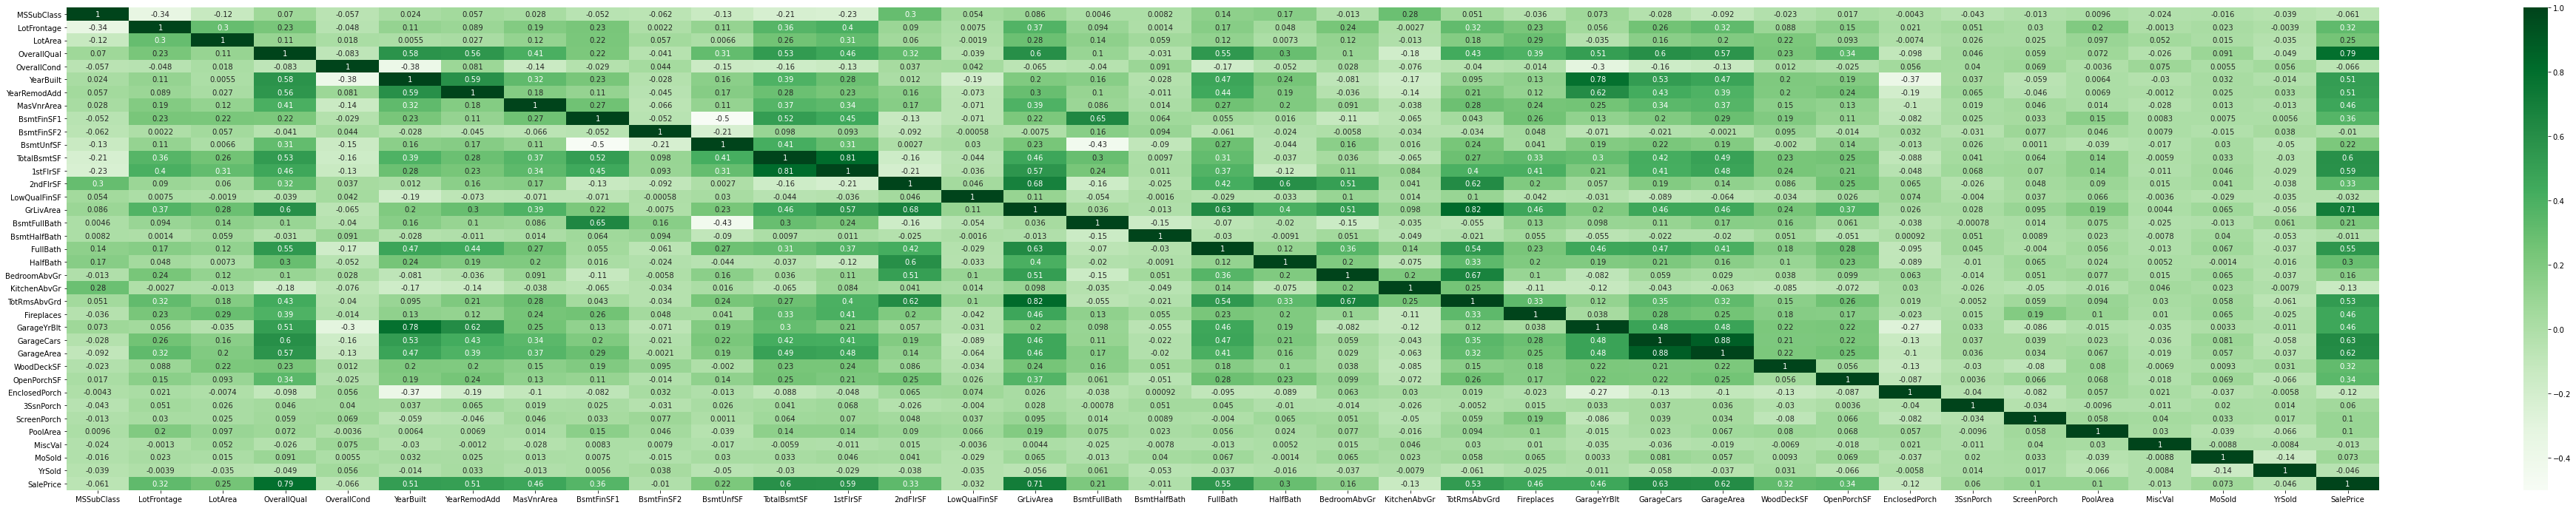

In [50]:
plt.figure(figsize=(70,12))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

Observartions-

Features GrLivArea, TotalBsmtSF,  GarageCars, GarageArea are positively high correlated to target SalePrice 
while features MSSubClass and OverallCond are negatively high correlated to target Sale price.

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1168.0,70.988470,22.437056,21.0,60.00,70.988470,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.500000,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.000000,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.000000,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.000000,2004.00,2010.0
MasVnrArea,1168.0,102.310078,182.047152,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.500000,714.50,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.000000,0.00,1474.0


Observations-

Maximum SalePrice of a house observed is 755000 and minimum is 34900.

# Encoding Categorical Columns-

In [57]:
#encoding categorical features using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
cat_features = df.columns[df.dtypes == object]

df = df.copy()
for x in cat_features:
    df[x] = oe.fit_transform(np.array(df[x]).reshape(-1,1))
    
print("Shape after encoding:- ", {df.shape})

#interpreting encoded dataframe
df.head()

Shape after encoding:-  {(1168, 74)}


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.98847,4928,1.0,0.0,3.0,4.0,0.0,13.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,20,3.0,95.00000,15865,1.0,0.0,3.0,4.0,1.0,12.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,60,3.0,92.00000,9920,1.0,0.0,3.0,1.0,0.0,15.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,20,3.0,105.00000,11751,1.0,0.0,3.0,4.0,0.0,14.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,20,3.0,70.98847,16635,1.0,0.0,3.0,2.0,0.0,14.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000


# Applying zscore-

In [58]:
#importing required libraries
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape

(1168, 74)

In [59]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int32), array([ 8, 19, 33, ..., 38, 60, 61], dtype=int32))


In [60]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1168, 74)
(482, 74)


In [62]:
print("% Loss after outlier checking:-" ,((len(df)-len(df_new))*100/len(df)))

% Loss after outlier checking:- 58.73287671232877


Since, % Loss of data is around 58%, therefore, discarding the outlier removal and proceeding with original data.

# Splitting the feature columns & target.

In [78]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

#Interpreting shape of variables
print(x.shape)
print(y.shape)

(1168, 73)
(1168,)


# Handling skewness

these all we have to handle it.

In [80]:
con_features = df.columns[df.dtypes != object]
skw = np.abs(x[con_features[:-1]].skew())
skw[skw>1]

MSSubClass        1.422019
MSZoning          1.796785
LotFrontage       2.710383
LotArea          10.659285
Street           17.021969
LandContour       3.125982
LotConfig         1.118821
LandSlope         4.812568
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
RoofStyle         1.498560
RoofMatl          7.577352
MasVnrArea        2.834658
ExterQual         1.810843
ExterCond         2.516219
BsmtQual          1.343781
BsmtCond          3.293554
BsmtExposure      1.166987
BsmtFinSF1        1.871606
BsmtFinType2      3.615783
BsmtFinSF2        4.365829
TotalBsmtSF       1.744591
Heating          10.103609
CentralAir        3.475188
Electrical        3.104209
1stFlrSF          1.513707
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtHalfBath      4.264403
KitchenAbvGr      4.365259
KitchenQual       1.408106
Functional        3.999663
GarageQual        4.582386
GarageCond        5.422472
PavedDrive        3.274035
WoodDeckSF        1.504929
O

In [81]:
trans_x = x.copy()

for x in con_features[:-1]:
    if np.abs(trans_x[x].skew())>1:
        trans_x[x] = power_transform(np.array(trans_x[x]).reshape(-1,1))

In [83]:
trans_x.skew()

MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
                   ...    
MiscVal           4.991071
MoSold            0.220979
YrSold            0.115765
SaleType         -2.067563
SaleCondition    -0.353292
Length: 73, dtype: float64

# Satndard Scaling

In [87]:
sc=StandardScaler()
x=sc.fit_transform(trans_x)
x=pd.DataFrame(x,columns=trans_x.columns)

In [89]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.370435,-0.162456,0.093658,-1.213954,0.058621,-1.373107,0.341434,0.617281,-0.238775,0.142224,...,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.617822,-0.605487,0.409069,0.029735
1,-1.167999,-0.162456,1.117135,1.100521,0.058621,-1.373107,0.341434,0.617281,4.188040,-0.024227,...,1.414498,-0.411301,-0.138554,3.360787,-0.077648,-0.193133,1.361470,-0.605487,0.409069,0.029735
2,0.490047,-0.162456,0.998803,0.158048,0.058621,-1.373107,0.341434,-1.482445,-0.238775,0.475125,...,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.128176,-0.605487,0.409069,0.029735
3,-1.167999,-0.162456,1.495566,0.496002,0.058621,-1.373107,0.341434,0.617281,-0.238775,0.308675,...,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.990233,1.651563,-2.769993,0.029735
4,-1.167999,-0.162456,0.093658,1.196626,0.058621,-1.373107,0.341434,-1.025661,-0.238775,0.308675,...,-1.061392,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.128176,0.899213,0.409069,0.029735


# PCA

In [91]:
#exploring the PCA-
from sklearn.decomposition import PCA

cov_matrix = PCA(n_components = len(x.columns))
cov_matrix.fit(x)

PCA(n_components=73)

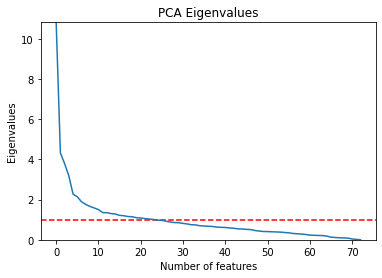

In [99]:
# Let's plot the PCA componenets

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(cov_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(cov_matrix.explained_variance_)
plt.show()

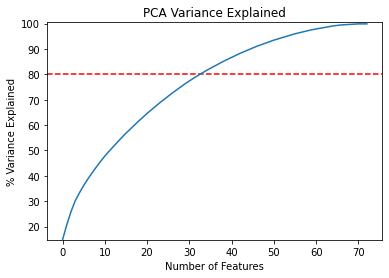

In [100]:
variance = cov_matrix.explained_variance_ratio_
var=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [103]:
pca=PCA(n_components=73)
xpca=pca.fit_transform(x)
x=xpca

In [104]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.678186,-0.795354,-2.135211,0.362901,-1.160100,0.415395,0.412832,0.199981,-0.207239,-0.343439,...,0.022172,0.290392,-0.313475,0.320892,-0.229229,0.253546,0.104217,0.040936,0.260517,-0.006229
1,2.512748,-2.209606,4.627474,-0.958849,4.178051,2.058400,-0.139734,3.969466,-3.002539,-3.074613,...,-0.507863,0.250463,-0.551998,0.003636,0.193275,0.345271,-0.081746,0.416779,-0.280011,0.113249
2,2.928657,-0.115345,0.568137,1.934273,0.748032,0.284758,1.175763,-0.653231,0.220006,1.322850,...,0.528841,-0.011211,-0.189836,-0.000105,-0.110740,-0.182797,0.151949,-0.136422,-0.040341,0.012696
3,2.012170,-1.181779,1.524139,-2.150709,-2.509563,-1.247071,0.021845,-1.024319,0.409271,-0.183437,...,0.094927,-0.432546,0.202421,-0.112755,-0.053352,-0.113631,-0.006397,-0.045943,-0.154815,-0.035158
4,1.909520,-2.214357,1.765051,-0.239301,-0.773006,-0.084869,0.166116,-0.645960,-1.972368,0.027235,...,0.769286,0.347979,-0.118724,0.324722,0.004727,0.057284,0.028564,0.318514,-0.087734,-0.008627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.430390,-1.829375,-0.173940,-0.324926,-0.996310,-1.863278,0.510224,-0.782553,0.165575,0.676897,...,-0.571803,-0.049799,-0.014176,-0.066569,0.158993,-0.079707,0.147120,0.046165,0.138760,-0.016754
1164,-1.867469,1.170762,-2.162082,-1.718314,1.603998,-0.876784,-0.228459,0.519649,1.052765,0.941716,...,0.569300,1.108978,0.477907,-0.623465,-0.082294,0.218042,0.468398,-0.256593,0.048394,0.042167
1165,-1.227228,0.205794,-2.154341,4.209534,-1.449420,0.409161,-0.048609,-0.403337,-0.879342,-0.283836,...,0.320368,0.036320,-1.296033,-0.758928,-0.050211,0.208892,0.222059,0.058330,-0.014551,-0.005236
1166,-6.234622,3.639823,0.798474,0.364264,-1.420112,1.771956,-0.098611,-0.783182,-0.935223,3.047953,...,-0.247630,-0.021650,0.342696,0.092426,0.342766,-0.504525,-0.047113,0.316358,-0.169327,0.001026


# Modelling

In [105]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 21 is 0.8777930016805641


In [108]:
#split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

In [110]:
model=[LinearRegression(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8484980622327689
Error:
Mean absolute error: 22775.24691222359
Mean squared error: 1228357810.4280434
Root Mean Squared Error: 35047.93589397304
r2_score: 0.812809320172576
*************************************************************


score of KNeighborsRegressor() is: 0.8127905940410998
Error:
Mean absolute error: 24936.664957264955
Mean squared error: 1448259290.100513
Root Mean Squared Error: 38056.002024654576
r2_score: 0.779298312935522
*************************************************************


score of SVR() is: -0.04553063120590939
Error:
Mean absolute error: 58249.80160365217
Mean squared error: 6882559548.304873
Root Mean Squared Error: 82961.19302604606
r2_score: -0.04884015867572655
*************************************************************


score of Lasso() is: 0.8484979972789402
Error:
Mean absolute error: 22771.863394932814
Mean squared error: 1228175110.552774
Root Mean Squared Error: 35045.329368587394
r2_score: 0.81283716198

# GradientBoost Regressor is giving us maximum r2_score as well as minimum rmse score so we choose it as our final model.

# Hyperparameter tuning model

In [117]:
parameters={
 'learning_rate': [0.1,0.2],
 'n_estimators': [200, 400, 600]}

In [119]:
gbr=GradientBoostingRegressor()

grfr=GridSearchCV(gbr,parameters,n_jobs=-1)
grfr.fit(x,y)
print(grfr.best_params_)

{'learning_rate': 0.2, 'n_estimators': 400}


In [120]:
#using the gradient boosting Regressor with its best parameters

GBR=GradientBoostingRegressor(n_estimators=400,learning_rate=0.2)
GBR.fit(x_train,y_train)
print('Score:',GBR.score(x_train,y_train))
y_pred=GBR.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.9998647621238339


Mean absolute error: 19481.744884886524
Mean squared error: 935487276.5402231
Root Mean Squared error: 30585.736488438906


r2_score: 0.8574401548320453




In [121]:
#Cross validate score of the model-

score=cross_val_score(GBR,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.89130052 0.90126293 0.88978505 0.70831023 0.88401131 0.78356685
 0.8246556  0.89222147 0.85206801 0.86682135]
Mean Score: 0.8494003325258669
Standard deviation: 0.058541629244629675


So as we can see very good cross validation score of 85% with minimal deviation.

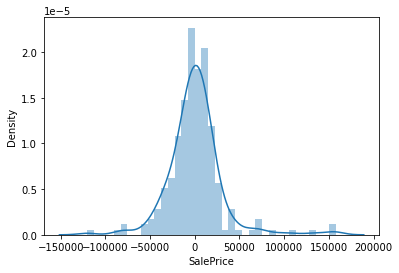

In [122]:
#plotting the distribution plot and the Gaussian plot-

sns.distplot(y_test-y_pred)
plt.show()

graph is uniformly normal distributed we can see that

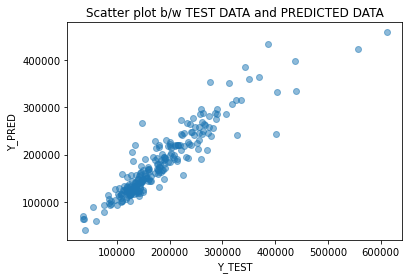

In [123]:
#plotting the Scatter plot between test data and predicted data-

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_TEST")
plt.ylabel("Y_PRED")
plt.title("Scatter plot b/w TEST DATA and PREDICTED DATA",fontsize=12)
plt.show()

 Final model, GradientBoostingRegressor performs with r2_score: 85% and cross_val_score: 86% and can be improved further by training with more specific data.

# Testing our test data-

In [124]:
#loading dataset-
df_test = pd.read_csv("housing test.csv")

In [125]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [126]:
#dropping columns-

drop_test_features = ['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities']
df_test.drop(columns=drop_test_features,inplace=True,axis=1)

In [127]:
df_test.shape

(292, 73)

In [128]:
#Replacing null values with mean value of data as data is continous is nature-
df_test['LotFrontage'].replace(np.nan,df_test['LotFrontage'].mean(),inplace=True)
df_test['GarageYrBlt'].replace(np.nan,df_test['GarageYrBlt'].mean(),inplace=True)
df_test['MasVnrArea'].replace(np.nan,df_test['MasVnrArea'].mean(),inplace=True)

In [135]:
#replacing null values with mode value of data  as data is categorical in nature-
df_test['GarageType'].replace(np.nan,df_test['GarageType'].mode()[0],inplace=True)
df_test['GarageFinish'].replace(np.nan,df_test['GarageFinish'].mode()[0],inplace=True)
df_test['GarageQual'].replace(np.nan,df_test['GarageQual'].mode()[0],inplace=True)
df_test['GarageCond'].replace(np.nan,df_test['GarageCond'].mode()[0],inplace=True)
df_test['BsmtExposure'].replace(np.nan,df_test['BsmtExposure'].mode()[0],inplace=True)
df_test['BsmtFinType2'].replace(np.nan,df_test['BsmtFinType2'].mode()[0],inplace=True)
df_test['BsmtFinType1'].replace(np.nan,df_test['BsmtFinType1'].mode()[0],inplace=True)
df_test['BsmtQual'].replace(np.nan,df_test['BsmtQual'].mode()[0],inplace=True)
df_test['BsmtCond'].replace(np.nan,df_test['BsmtCond'].mode()[0],inplace=True)
df_test['Electrical'].replace(np.nan,df_test['Electrical'].mode()[0],inplace=True)
df_test['MasVnrType'].replace(np.nan,df_test['MasVnrType'].mode()[0],inplace=True)

<AxesSubplot:>

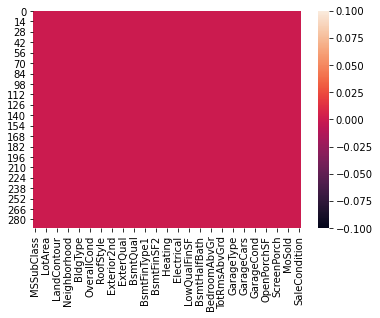

In [136]:
#checking null values - no null values present-

sns.heatmap(df_test.isnull())

In [137]:
#encoding categorical features using OrdinalEncoder

oe = OrdinalEncoder()
cat_features = df_test.columns[df_test.dtypes == object]

df_test = df_test.copy()
for x in cat_features:
    df_test[x] = oe.fit_transform(np.array(df_test[x]).reshape(-1,1))
    
print("Shape after encoding:- ", {df_test.shape})

#interpreting encoded dataframe
df_test.head()

Shape after encoding:-  {(292, 73)}


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2.0,86.000000,14157,1.0,0.0,1.0,0.0,0.0,21.0,...,51,0,0,0,0,0,7,2007,5.0,2.0
1,120,2.0,66.425101,5814,1.0,0.0,3.0,1.0,0.0,21.0,...,0,0,0,0,0,0,8,2009,0.0,0.0
2,20,2.0,66.425101,11838,1.0,3.0,3.0,4.0,0.0,4.0,...,151,0,0,0,0,0,6,2009,5.0,2.0
3,70,2.0,75.000000,12000,1.0,3.0,0.0,4.0,0.0,5.0,...,0,0,0,0,0,0,7,2009,5.0,2.0
4,60,2.0,86.000000,14598,1.0,0.0,3.0,1.0,0.0,20.0,...,18,0,0,0,0,0,1,2008,5.0,2.0


In [138]:
#checking datatypes & null values -

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    float64
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    float64
 5   LotShape       292 non-null    float64
 6   LandContour    292 non-null    float64
 7   LotConfig      292 non-null    float64
 8   LandSlope      292 non-null    float64
 9   Neighborhood   292 non-null    float64
 10  Condition1     292 non-null    float64
 11  Condition2     292 non-null    float64
 12  BldgType       292 non-null    float64
 13  HouseStyle     292 non-null    float64
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [147]:
#handling skewness in the test datset-

con_features = df_test.columns[df_test.dtypes != object]
skw_t = np.abs(df_test[con_features[:-1]].skew())
skw_t[skw_t>1]

MSSubClass        1.358597
LotArea          12.781805
Street           12.020386
LandContour       3.332422
LotConfig         1.204667
LandSlope         4.639043
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
OverallCond       1.209714
RoofStyle         1.386333
RoofMatl         13.717569
MasVnrArea        1.976804
ExterQual         1.920606
ExterCond         3.595056
BsmtQual          1.348604
BsmtCond          4.869596
BsmtExposure      1.289092
BsmtFinType2      3.702330
BsmtFinSF2        3.698543
Heating           8.212666
CentralAir        3.792878
Electrical        2.990818
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtHalfBath      3.544994
KitchenAbvGr      4.849432
KitchenQual       1.493903
Functional        4.911353
GarageQual        4.631453
GarageCond        5.583300
PavedDrive        3.474356
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
M

In [149]:
trans_x_test = df_test.copy()

for x in con_features[:-1]:
    if np.abs(trans_x_test[x].skew())>1:
        trans_x_test[x] = power_transform(np.array(trans_x_test[x]).reshape(-1,1))

In [150]:
#standard scaling dataset-

sc=StandardScaler()
df_test=sc.fit_transform(trans_x_test)
df_test=pd.DataFrame(df_test,columns=trans_x_test.columns)

In [151]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.149768,-0.287006,0.981605,0.842656,0.083045,-1.402669,-3.162098,-1.784025,-0.232705,1.554460,...,0.718308,-0.392619,-0.083045,-0.278372,0.0,-0.188311,0.276960,-0.650908,0.299220,0.148654
1,1.337666,-0.287006,0.000000,-0.739104,0.083045,-1.402669,0.319149,-1.582249,-0.232705,1.554460,...,-1.111540,-0.392619,-0.083045,-0.278372,0.0,-0.188311,0.637997,0.863555,-3.414879,-3.323909
2,-1.149768,-0.287006,0.000000,0.524304,0.083045,0.745474,0.319149,0.617410,-0.232705,-1.281387,...,1.278346,-0.392619,-0.083045,-0.278372,0.0,-0.188311,-0.084077,0.863555,0.299220,0.148654
3,0.705404,-0.287006,0.429998,0.548484,0.083045,0.745474,-3.163564,0.617410,-0.232705,-1.114572,...,-1.111540,-0.392619,-0.083045,-0.278372,0.0,-0.188311,0.276960,0.863555,0.299220,0.148654
4,0.507343,-0.287006,0.981605,0.897263,0.083045,-1.402669,0.319149,-1.582249,-0.232705,1.387645,...,0.218396,-0.392619,-0.083045,-0.278372,0.0,-0.188311,-1.889261,0.106324,0.299220,0.148654


In [152]:
#exploring the PCA-


cov_matrix = PCA(n_components = len(df_test.columns))
cov_matrix.fit(df_test)

PCA(n_components=73)

In [154]:
pca=PCA(n_components=73)
xpca=pca.fit_transform(df_test)
df_test=xpca

In [155]:
pd.DataFrame(data=df_test)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,6.634365,2.951670,0.699517,1.403101,0.580478,-1.263741,1.058991,-0.366380,-0.055442,-0.282317,...,0.181360,-0.286775,-0.038649,0.043286,-0.020087,0.056673,-0.012239,-0.067909,0.009617,-3.741141e-16
1,1.292139,2.181889,-2.525421,-1.531807,2.160713,-2.160146,0.095358,-0.178465,-2.889442,0.878278,...,-0.034211,0.276586,0.159600,-0.222029,0.143763,0.175255,-0.138503,-0.076020,-0.026456,-6.968677e-17
2,4.094370,0.172971,0.265307,3.652378,0.198673,0.494610,-0.966908,-1.209483,-0.211564,0.874474,...,-0.219381,-0.130267,-0.171794,-0.003494,0.187020,0.209999,-0.019563,-0.051423,-0.007006,-7.516983e-17
3,-2.007627,-1.268031,1.595939,-0.361970,-1.379528,0.028327,1.147000,0.148393,-0.328738,0.123734,...,0.006267,0.161295,-0.259909,0.308747,0.247401,0.136547,-0.091280,-0.020615,0.005173,2.995230e-16
4,4.155762,-2.827302,0.973279,0.646949,-0.516601,0.624517,1.161112,0.765455,-0.347127,0.420554,...,0.464131,0.063409,-0.097836,-0.112751,-0.169863,0.406178,-0.065765,0.031965,0.012718,-3.359629e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.763176,0.287330,-0.023158,2.703344,0.168221,1.137994,-1.625634,-0.370990,-0.520495,0.303408,...,0.744026,0.143222,0.262154,-0.266396,-0.014754,0.240841,-0.052232,0.000370,-0.001358,5.434088e-17
288,-1.025523,0.943310,-1.593284,0.664342,-1.458237,0.799416,-1.100896,0.958092,1.704690,-0.890791,...,0.028368,-0.068722,-0.052560,-0.162568,0.286330,-0.247562,-0.044684,0.045703,0.015167,2.269598e-16
289,-0.604464,2.568036,-1.042451,-0.180160,-1.758062,-0.095882,-0.957380,1.412270,1.152125,-2.627296,...,-0.061500,0.007073,0.240013,-0.385994,0.056440,0.073711,-0.008584,0.094007,0.011925,-5.083535e-16
290,-2.757517,-0.586821,1.678725,-0.581569,-0.992035,-1.271636,0.625983,-0.591708,-3.223892,-0.617858,...,-0.015570,0.479894,0.038426,-0.553377,-0.353402,-0.028258,-0.086960,0.078764,0.003455,-3.264731e-17


In [156]:
#saving our best model-

import joblib
joblib.dump(GBR,'Housing_Project.pkl')

['Housing_Project.pkl']

In [161]:
model_file_name = 'Housing_Project.pkl'
loaded_model = joblib.load(model_file_name)

In [162]:
#Predicting Test Data
predict_test = loaded_model.predict(df_test)

In [163]:
#Displaying Predicted Data
pred_t = pd.DataFrame({"Predicted_Data": predict_test})
pred_t

,Predicted_Data
0,377218.507517
1,200942.831710
2,284680.217332
3,143769.819614
4,254913.237880
...,...
287,266016.917372
288,122733.596308
289,130111.002672
290,146524.216674


In [164]:
#Saving predicted data to csv file
#pred_t.to_csv('predicted_test_data.csv')

# -->>  END PROJECT